In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Data preparation

In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/data_preparation.csv'
data=pd.read_csv(path)

NameError: name 'pd' is not defined

In [ ]:
data

NameError: name 'data' is not defined

In [ ]:
data_class_res=data[[ 'gender', 'parental level of education', 'lunch', 'test preparation course', 'race_group A', 'race_group B', 'race_group C', 'race_group D', 'race_group E','result']]
data_class_res

In [ ]:
#data_class_res = data_class_res.drop_duplicates()
data_class_res

In [ ]:
data_class_ment=data[[ 'gender', 'parental level of education', 'lunch', 'test preparation course', 'race_group A', 'race_group B', 'race_group C', 'race_group D', 'race_group E','mention_code']]
data_class_ment

# Classification en se basant sur la TARGET "PASS"

---



## Data Preparation

In [ ]:
# Séparation des caractéristiques (variables d'entrée) et de la cible (variable à prédire)
# X contient toutes les colonnes sauf 'mention_code'
# y contient la colonne 'mention_code' (la variable cible)

X = data_class_res.drop('result', axis=1)
y = data_class_res['result']

In [ ]:
#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### une sélection de features importantes avec Random Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
# Création d'un modèle Random Forest pour la classification
# n_estimators=100: Spécifie le nombre d'arbres dans la forêt
# random_state=42: Assure la reproductibilité des résultats (les mêmes résultats à chaque exécution)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle Random Forest sur les données d'entraînement (X et y)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Récupération de l'importance de chaque caractéristique après l'entraînement
# model.feature_importances_ contient les scores d'importance pour chaque colonne dans X
# On crée une série pandas pour associer les scores aux noms des colonnes
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

In [ ]:
# Affichage de l'importance des caractéristiques, triées par ordre décroissant
print("Importance des caractéristiques :")
print(feature_importances.sort_values(ascending=False))

Importance des caractéristiques :
parental level of education    0.411821
lunch                          0.140614
gender                         0.120269
test preparation course        0.118035
race_group B                   0.065572
race_group C                   0.039552
race_group A                   0.036752
race_group D                   0.034909
race_group E                   0.032477
dtype: float64


Text(0, 0.5, 'Caractéristiques')

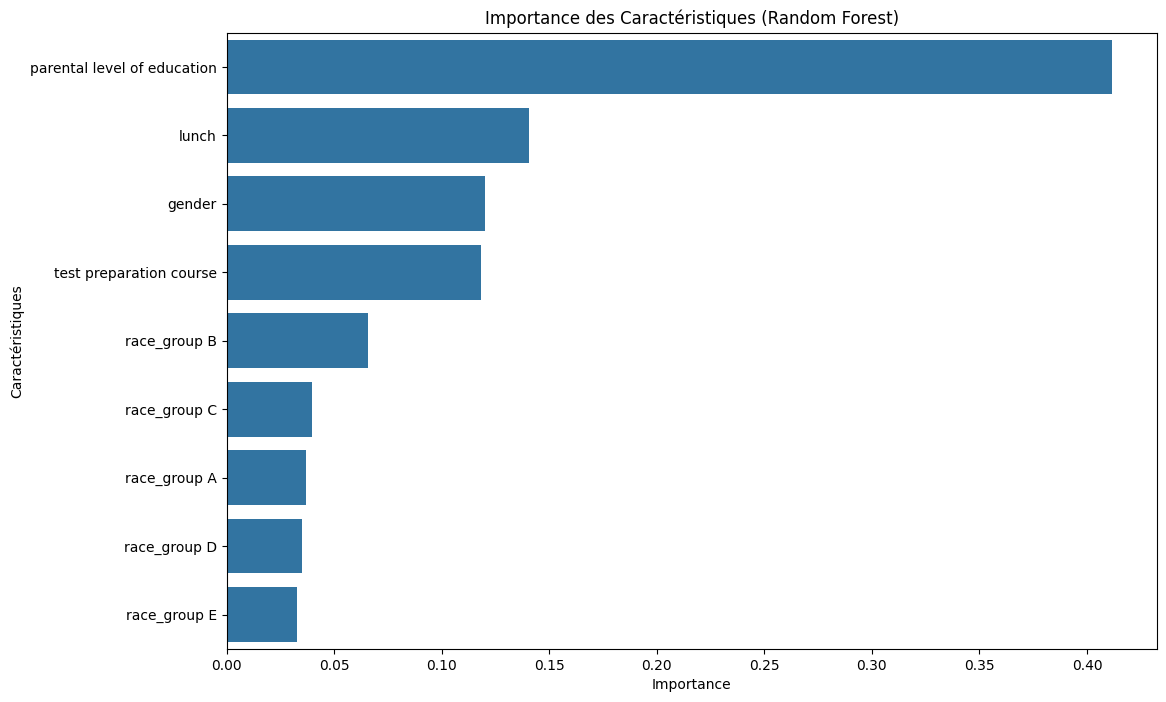

In [ ]:
# Tri de l'importance des caractéristiques par ordre décroissant
sorted_feature_importances = feature_importances.sort_values(ascending=False)
# Création d'un graphique à barres pour visualiser l'importance des caractéristiques
plt.figure(figsize=(12, 8)) # Ajustez la taille de la figure si nécessaire
sns.barplot(x=sorted_feature_importances, y=sorted_feature_importances.index)

# Ajout de titres et labels pour une meilleure lisibilité
plt.title('Importance des Caractéristiques (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')

In [ ]:
# 1. Modèle AVEC les colonnes "race"
rf_with_race = RandomForestClassifier()
rf_with_race.fit(X, y)
score_with = rf_with_race.score(X, y)

# 2. Modèle SANS les colonnes "race"
X_no_race = X.drop(columns=['race_group A', 'race_group B', 'race_group C', 'race_group D', 'race_group E'])
rf_no_race = RandomForestClassifier()
rf_no_race.fit(X_no_race, y)
score_without = rf_no_race.score(X_no_race, y)

print(f"Score avec race: {score_with}")
print(f"Score sans race: {score_without}")


Score avec race: 0.9
Score sans race: 0.897


In [ ]:
# Création du nouveau DataFrame en supprimant les colonnes 'race_group'
# axis=1 indique qu'on supprime des colonnes (axis=0 serait pour des lignes)
# inplace=False par défaut, ce qui signifie que la suppression retourne un nouveau DataFrame
data_class_res_RF = data_class_res.drop(columns=['race_group A', 'race_group B', 'race_group C', 'race_group D', 'race_group E'])

In [ ]:
data_class_res_RF

,gender,parental level of education,lunch,test preparation course,result
0,0,4,1,0,1
1,0,2,1,1,1
2,0,5,1,0,1
3,1,3,0,0,0
4,1,2,1,0,1
...,...,...,...,...,...
995,0,5,1,1,1
996,1,1,0,0,1
997,0,1,0,1,1
998,0,2,1,1,1


### réduction de dimension via PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# 1. Standardiser les caractéristiques
# Il est crucial de standardiser les données avant d'appliquer la PCA
#Standardisation (fit sur train, transform sur train + test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 2. Appliquer la PCA
# On peut commencer par ne pas spécifier le nombre de composantes pour analyser la variance expliquée
pca = PCA()
X_pca = pca.fit_transform(X_train_scaled)

In [ ]:
# Analyser la variance expliquée par chaque composante
explained_variance_ratio = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante principale :")
print(explained_variance_ratio)

Variance expliquée par chaque composante principale :
[1.59798896e-01 1.44775818e-01 1.38823605e-01 1.33628534e-01
 1.14721217e-01 1.05501246e-01 1.02221101e-01 1.00529582e-01
 2.46290280e-16]


In [ ]:
# Calculer la variance cumulée expliquée
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("\nVariance cumulée expliquée par les composantes principales :")
print(cumulative_explained_variance)



Variance cumulée expliquée par les composantes principales :
[0.1597989  0.30457471 0.44339832 0.57702685 0.69174807 0.79724932
 0.89947042 1.         1.        ]


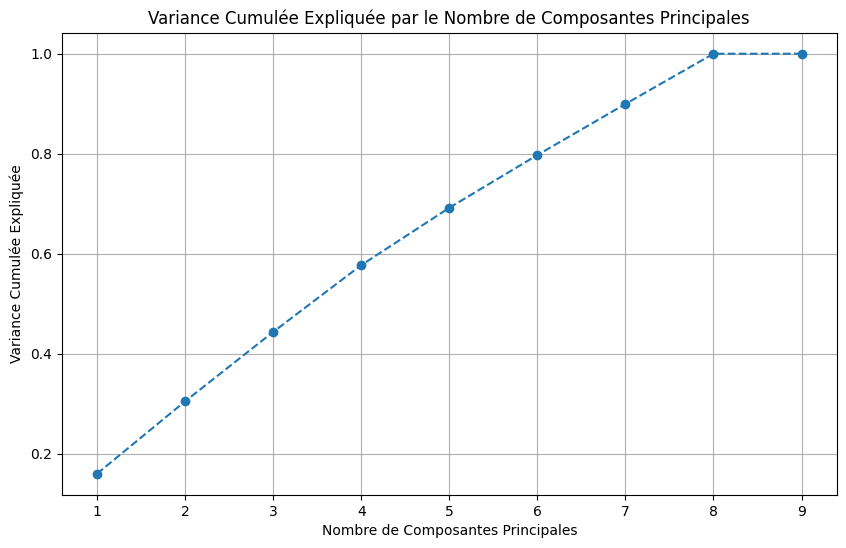

In [ ]:
# 3. Visualiser la variance expliquée pour aider à choisir le nombre de composantes
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Variance Cumulée Expliquée par le Nombre de Composantes Principales')
plt.xlabel('Nombre de Composantes Principales')
plt.ylabel('Variance Cumulée Expliquée')
plt.grid(True)
plt.show()

In [ ]:
# --------------- Après analyse, choisissez le nombre de composantes à conserver ---------------
# Basé sur variance cumulée expliquée, 7 composantes expliquent environ 90%.
n_components_to_keep = 7

scaler = StandardScaler()
X_scaled_full = scaler.fit_transform(X)

pca_final = PCA(n_components=n_components_to_keep)
X_pca_final = pca_final.fit_transform(X_scaled_full)

In [ ]:
# Créer un nouveau DataFrame avec les composantes principales
# Les noms des colonnes seront 'PC1', 'PC2', etc.
pca_columns = [f'PC{i+1}' for i in range(n_components_to_keep)]
data_class_res_PCA = pd.DataFrame(data=X_pca_final, columns=pca_columns)

# Ajouter la colonne cible au nouveau DataFrame si vous en avez besoin pour la modélisation
data_class_res_PCA['result'] = y.reset_index(drop=True) # Utiliser y du DataFrame original et réinitialiser l'index

print(f"\nNouveau DataFrame avec {n_components_to_keep} composantes principales :")
data_class_res_PCA


Nouveau DataFrame avec 7 composantes principales :


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,result
0,-0.232192,1.412320,-0.725658,-1.673591,-0.049959,-1.454084,0.063150,1
1,1.868830,-0.237665,0.030232,-0.267658,0.248870,0.972489,-1.083295,1
2,-0.162782,1.256527,-0.565786,-1.863232,-0.312516,-1.692228,0.305301,1
3,-0.623150,0.393340,-0.079235,3.086156,-1.590979,-1.406076,0.699915,0
4,1.350633,-0.489562,-0.205623,0.492913,1.363358,-0.263981,0.944403,1
...,...,...,...,...,...,...,...,...
995,0.226652,0.267619,3.188151,-1.348123,-0.852570,-0.204762,-0.614380,1
996,1.296911,-0.383534,-0.734408,0.851479,-0.046353,0.171651,1.275847,1
997,1.815108,-0.131637,-0.498553,0.090907,-1.160841,1.408120,-0.751852,1
998,-1.060842,-1.095117,-0.019186,-0.686729,0.003873,1.178384,-1.466555,1


### réduction de dimension via PCA + une sélection de features importantes via Random Forest

In [ ]:
# 1. Séparation des features et cible
X_pca3 = data_class_res_PCA.drop(columns=['result'])
y_pca3 = data_class_res_PCA['result']

# 2. Division train/test
X_train_pca3 , X_test_pca3, y_train_pca3, y_test_pca3 = train_test_split(X_pca3, y_pca3, test_size=0.3, random_state=42)

In [ ]:
# 1. Entraîner Random Forest sur les composantes principales
rf = RandomForestClassifier(random_state=42)
rf.fit(X_pca3, y_pca3)

# 2. Obtenir l'importance des composantes principales
importances = rf.feature_importances_

In [ ]:
# 3. Afficher l'importance de chaque composante PCA
for i, imp in enumerate(importances, 1):
    print(f"Importance PC{i}: {imp:.4f}")

Importance PC1: 0.1272
Importance PC2: 0.1159
Importance PC3: 0.1937
Importance PC4: 0.1663
Importance PC5: 0.1487
Importance PC6: 0.1160
Importance PC7: 0.1322


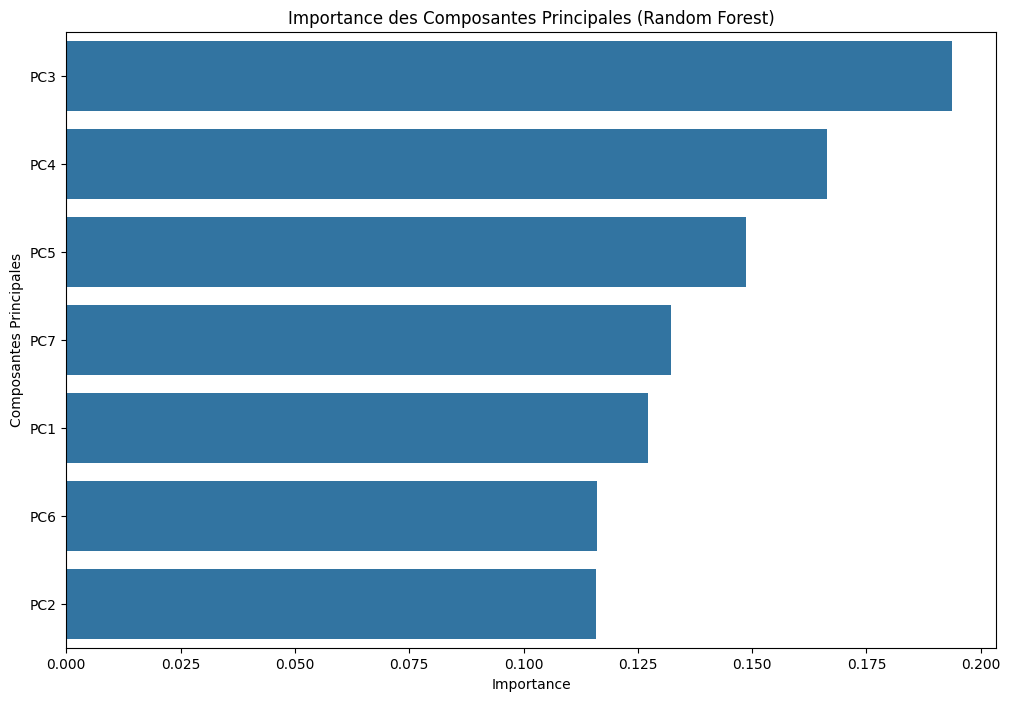

In [ ]:
# 2. Obtenir l'importance des composantes principales
importances = rf.feature_importances_

# Créer une série Pandas pour associer les importances aux noms des composantes principales
feature_importances_pca3 = pd.Series(importances, index=X_pca3.columns)

# Tri de l'importance des caractéristiques par ordre décroissant
sorted_feature_importances_pca3 = feature_importances_pca3.sort_values(ascending=False)

# Création d'un graphique à barres pour visualiser l'importance des caractéristiques
plt.figure(figsize=(12, 8)) # Ajustez la taille de la figure si nécessaire
sns.barplot(x=sorted_feature_importances_pca3, y=sorted_feature_importances_pca3.index)

# Ajout de titres et labels pour une meilleure lisibilité
plt.title('Importance des Composantes Principales (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Composantes Principales')

# Afficher le graphique
plt.show()

## Application des algorithmes pour la classification

### data preparation

In [ ]:
print("data_class_res \n")
data_class_res.info()
print("_________________________________________________")
print("\n")
print("data_class_res_RF\n")
data_class_res_RF.info()
print("_________________________________________________")
print("\n")
print("data_class_res_PCA\n")
data_class_res_PCA.info()

data_class_res 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   parental level of education  1000 non-null   int64
 2   lunch                        1000 non-null   int64
 3   test preparation course      1000 non-null   int64
 4   race_group A                 1000 non-null   int64
 5   race_group B                 1000 non-null   int64
 6   race_group C                 1000 non-null   int64
 7   race_group D                 1000 non-null   int64
 8   race_group E                 1000 non-null   int64
 9   result                       1000 non-null   int64
dtypes: int64(10)
memory usage: 78.3 KB
_________________________________________________


data_class_res_RF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5

In [ ]:
data_class_res.head(1)

,gender,parental level of education,lunch,test preparation course,race_group A,race_group B,race_group C,race_group D,race_group E,result
0,0,4,1,0,0,1,0,0,0,1


In [ ]:
data_class_res_RF.head(1)

,gender,parental level of education,lunch,test preparation course,result
0,0,4,1,0,1


In [ ]:
data_class_res_PCA.head(1)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,result
0,-0.232192,1.41232,-0.725658,-1.673591,-0.049959,-1.454084,0.06315,1


In [ ]:
def prepare_X_y(df, target='result'):
    return df.drop(columns=[target]), df[target]

X_normal, y_normal = prepare_X_y(data_class_res)
X_rf, y_rf = prepare_X_y(data_class_res_RF)
X_pca, y_pca = prepare_X_y(data_class_res_PCA)

In [ ]:
### -Standardisation + split ---
scaler = StandardScaler()

def scale_and_split(X, y):
    X_scaled = scaler.fit_transform(X)
    return train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Xn_train, Xn_test, yn_train, yn_test = scale_and_split(X_normal, y_normal)
Xrf_train, Xrf_test, yrf_train, yrf_test = scale_and_split(X_rf, y_rf)
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

### SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


Grid Searh pour obtenir les meilleurs paramètres de mon modèle.

In [ ]:
# Fonction pour appliquer Grid Search à un jeu de données
def perform_grid_search(X, y, dataset_name=''):
    print(f"\n=== Grid Search pour {dataset_name} ===")

    # Définir les hyperparamètres à tester
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']  # applicable pour RBF, poly
    }

    # Créer le modèle SVC
    svc = SVC()

    # Configuration de la recherche par grille avec validation croisée à 5 plis
    grid_search = GridSearchCV(estimator=svc, param_grid=param_grid,
                               cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

    # Apprentissage
    grid_search.fit(X, y)

    # Résultats
    print(f"Meilleurs paramètres pour {dataset_name} : {grid_search.best_params_}")
    print(f"Meilleure précision pour {dataset_name} : {grid_search.best_score_:.4f}")

    return grid_search.best_estimator_



In [ ]:
# Appliquer la recherche sur les trois datasets
model_normal = perform_grid_search(X_normal, y_normal, 'X_normal')
model_rf = perform_grid_search(X_rf, y_rf, 'X_rf')
model_pca = perform_grid_search(X_pca, y_pca, 'X_pca')


=== Grid Search pour X_normal ===
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Meilleurs paramètres pour X_normal : {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Meilleure précision pour X_normal : 0.8970

=== Grid Search pour X_rf ===
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Meilleurs paramètres pour X_rf : {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Meilleure précision pour X_rf : 0.8970

=== Grid Search pour X_pca ===
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Meilleurs paramètres pour X_pca : {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Meilleure précision pour X_pca : 0.8970


#### 1.  *** mauvaise SVC classification ***




In [ ]:
# Création manuelle des modèles finaux
model_normal = SVC(C=0.1, kernel='linear', gamma='scale')
model_rf = SVC(C=0.1, kernel='linear', gamma='scale')
model_pca = SVC(C=0.1, kernel='linear', gamma='scale')

# Entraînement sur les jeux d'entraînement
model_normal.fit(Xn_train, yn_train)
model_rf.fit(Xrf_train, yrf_train)
model_pca.fit(Xpca_train, ypca_train)


SVC(C=0.1, kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test, dataset_name):
    """
    Évalue un modèle de classification et affiche les métriques.
    """
    print(f"\n=== Évaluation du modèle sur {dataset_name} ===")

    # Prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)

    # Calcul de l'accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy : {accuracy:.4f}")

    # Calcul du F1-score (macro average pour les classes déséquilibrées si nécessaire)
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"F1-score (macro) : {f1:.4f}")

    # Affichage du rapport de classification (precision, recall, f1-score par classe)
    print("\nRapport de classification :")
    print(classification_report(y_test, y_pred))

    # Affichage de la matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matrice de Confusion pour {dataset_name}')
    plt.xlabel('Prédit')
    plt.ylabel('Réel')
    plt.show()



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
import pandas as pd # Import pandas

# Fonction de suréchantillonnage et d'entraînement pour SVC, retournant les métriques
def oversample_and_train_svc_and_collect_metrics(X_train, y_train, X_test, y_test, method_name, dataset_name):
    print(f"\n=== Entraînement SVC avec {method_name} sur {dataset_name} ===")

    # Choix de la méthode de suréchantillonnage
    if method_name == 'SMOTE':
        sampler = SMOTE(random_state=42)
    elif method_name == 'ADASYN':
        sampler = ADASYN(random_state=42)
    elif method_name == 'SMOTETomek':
        sampler = SMOTETomek(random_state=42)
    elif method_name == 'None': # Add a case for no oversampling for comparison
        sampler = None
    else:
        raise ValueError("Méthode inconnue : SMOTE, ADASYN, SMOTETomek ou None")

    # Suréchantillonnage (si un échantillonneur est sélectionné)
    if sampler:
        X_res, y_res = sampler.fit_resample(X_train, y_train)
    else:
        X_res, y_res = X_train, y_train # Use original data if no sampler

    # Entraîner le modèle SVC
    # You can use the best parameters found by GridSearchCV here if you prefer
    model = SVC(C=0.1, kernel='linear', gamma='scale', random_state=42) # Added random_state for reproducibility
    # Si tu veux tester class_weight='balanced' AVEC oversampling, tu peux le mettre ici
    # model = SVC(C=0.1, kernel='linear', gamma='scale', class_weight='balanced', random_state=42)

    model.fit(X_res, y_res)

    # Prédiction sur le jeu de test
    y_pred = model.predict(X_test)

    # Évaluation
    print(f"\n=== Évaluation SVC avec {method_name} sur {dataset_name} ===")
    report = classification_report(y_test, y_pred, output_dict=True, digits=4)

    # Affichage du rapport de classification
    print("Rapport de classification :")
    print(classification_report(y_test, y_pred, digits=4))

    # Créer un dictionnaire des métriques
    metrics = {
        'Model': 'SVC',
        'Dataset': dataset_name,
        'Resampling Method': method_name,
        'Accuracy': report['accuracy'],
        'Precision (Class 0)': report.get('0', {}).get('precision', 0.0),
        'Recall (Class 0)': report.get('0', {}).get('recall', 0.0),
        'F1-score (Class 0)': report.get('0', {}).get('f1-score', 0.0),
        'Precision (Class 1)': report.get('1', {}).get('precision', 0.0),
        'Recall (Class 1)': report.get('1', {}).get('recall', 0.0),
        'F1-score (Class 1)': report.get('1', {}).get('f1-score', 0.0),
        'Macro Avg Precision': report['macro avg']['precision'],
        'Macro Avg Recall': report['macro avg']['recall'],
        'Macro Avg F1-score': report['macro avg']['f1-score']
    }


    # Affichage de la matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"Matrice de Confusion - {dataset_name} ({method_name})")
    plt.grid(False)
    plt.show()

    return metrics # Retourner le dictionnaire


=== Entraînement SVC avec None sur X_normal ===

=== Évaluation SVC avec None sur X_normal ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        27
           1     0.8650    1.0000    0.9276       173

    accuracy                         0.8650       200
   macro avg     0.4325    0.5000    0.4638       200
weighted avg     0.7482    0.8650    0.8024       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

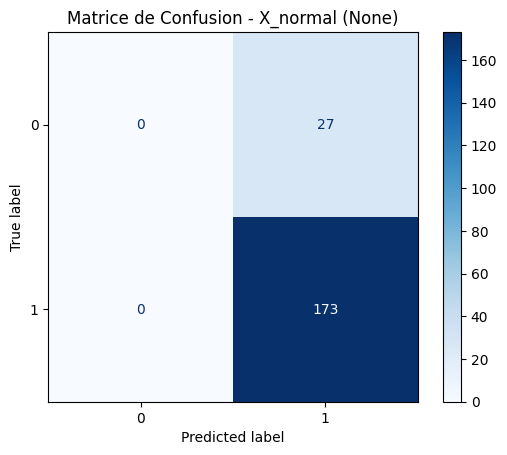


=== Entraînement SVC avec SMOTE sur X_normal ===

=== Évaluation SVC avec SMOTE sur X_normal ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2267    0.6296    0.3333        27
           1     0.9200    0.6647    0.7718       173

    accuracy                         0.6600       200
   macro avg     0.5733    0.6472    0.5526       200
weighted avg     0.8264    0.6600    0.7126       200



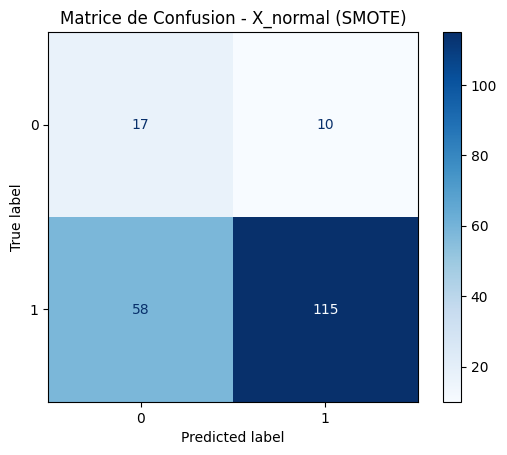


=== Entraînement SVC avec ADASYN sur X_normal ===

=== Évaluation SVC avec ADASYN sur X_normal ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2278    0.6667    0.3396        27
           1     0.9256    0.6474    0.7619       173

    accuracy                         0.6500       200
   macro avg     0.5767    0.6570    0.5508       200
weighted avg     0.8314    0.6500    0.7049       200



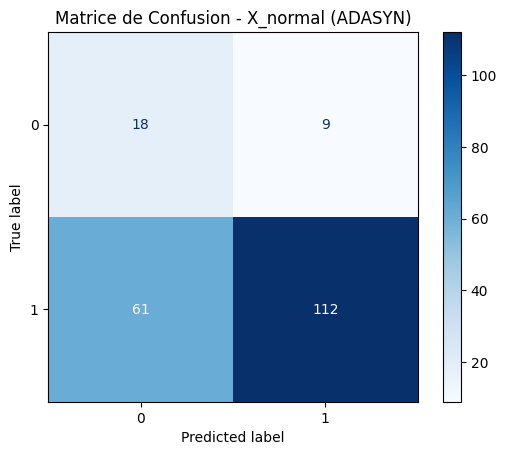


=== Entraînement SVC avec SMOTETomek sur X_normal ===

=== Évaluation SVC avec SMOTETomek sur X_normal ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2267    0.6296    0.3333        27
           1     0.9200    0.6647    0.7718       173

    accuracy                         0.6600       200
   macro avg     0.5733    0.6472    0.5526       200
weighted avg     0.8264    0.6600    0.7126       200



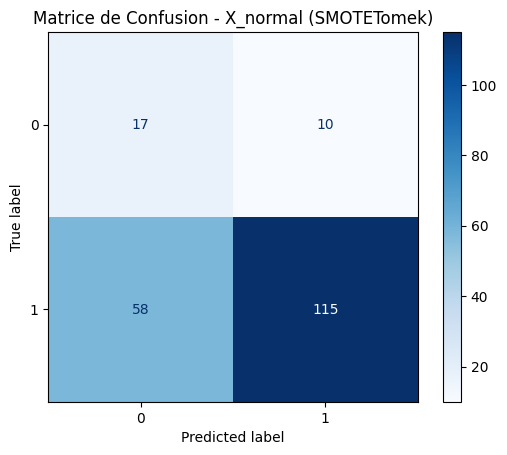


=== Entraînement SVC avec None sur X_rf ===

=== Évaluation SVC avec None sur X_rf ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        27
           1     0.8650    1.0000    0.9276       173

    accuracy                         0.8650       200
   macro avg     0.4325    0.5000    0.4638       200
weighted avg     0.7482    0.8650    0.8024       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

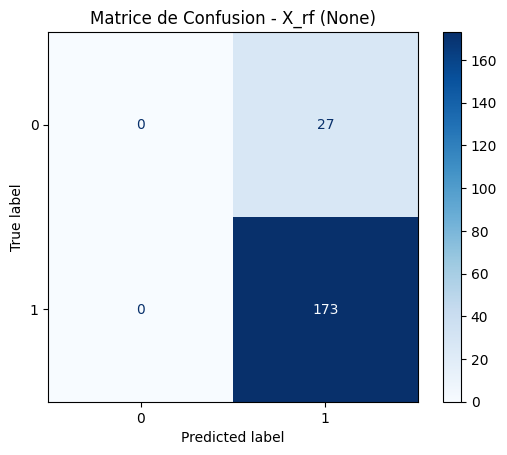


=== Entraînement SVC avec SMOTE sur X_rf ===

=== Évaluation SVC avec SMOTE sur X_rf ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2235    0.7037    0.3393        27
           1     0.9304    0.6185    0.7431       173

    accuracy                         0.6300       200
   macro avg     0.5770    0.6611    0.5412       200
weighted avg     0.8350    0.6300    0.6885       200



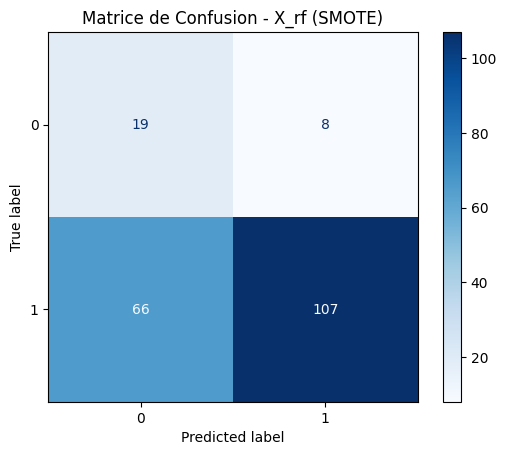


=== Entraînement SVC avec ADASYN sur X_rf ===

=== Évaluation SVC avec ADASYN sur X_rf ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2209    0.7037    0.3363        27
           1     0.9298    0.6127    0.7387       173

    accuracy                         0.6250       200
   macro avg     0.5754    0.6582    0.5375       200
weighted avg     0.8341    0.6250    0.6844       200



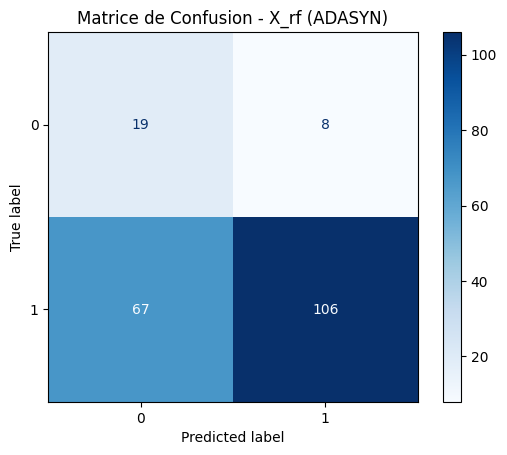


=== Entraînement SVC avec SMOTETomek sur X_rf ===

=== Évaluation SVC avec SMOTETomek sur X_rf ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2235    0.7037    0.3393        27
           1     0.9304    0.6185    0.7431       173

    accuracy                         0.6300       200
   macro avg     0.5770    0.6611    0.5412       200
weighted avg     0.8350    0.6300    0.6885       200



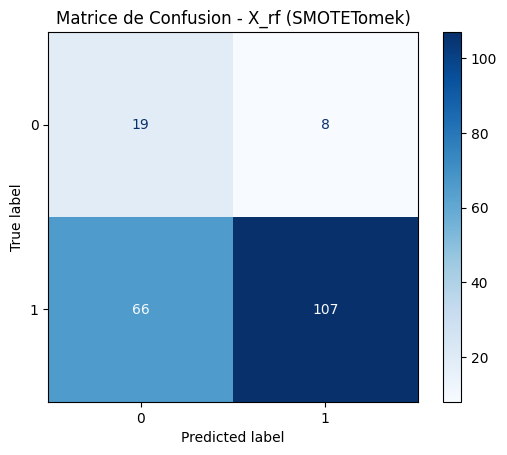


=== Entraînement SVC avec None sur X_pca ===

=== Évaluation SVC avec None sur X_pca ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        27
           1     0.8650    1.0000    0.9276       173

    accuracy                         0.8650       200
   macro avg     0.4325    0.5000    0.4638       200
weighted avg     0.7482    0.8650    0.8024       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

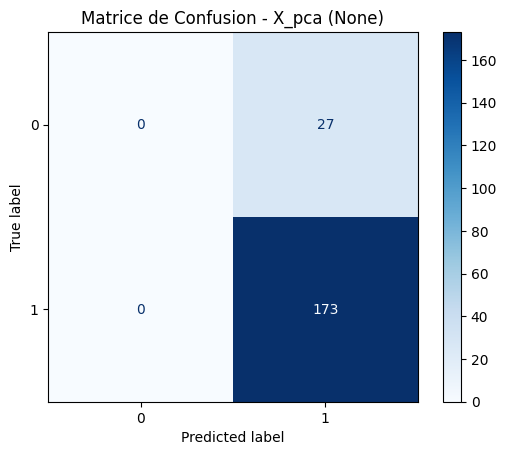


=== Entraînement SVC avec SMOTE sur X_pca ===

=== Évaluation SVC avec SMOTE sur X_pca ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.1519    0.4444    0.2264        27
           1     0.8760    0.6127    0.7211       173

    accuracy                         0.5900       200
   macro avg     0.5140    0.5286    0.4738       200
weighted avg     0.7783    0.5900    0.6543       200



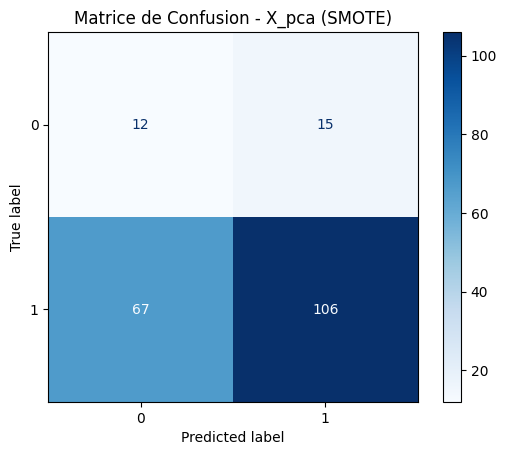


=== Entraînement SVC avec ADASYN sur X_pca ===

=== Évaluation SVC avec ADASYN sur X_pca ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2045    0.6667    0.3130        27
           1     0.9196    0.5954    0.7228       173

    accuracy                         0.6050       200
   macro avg     0.5621    0.6310    0.5179       200
weighted avg     0.8231    0.6050    0.6675       200



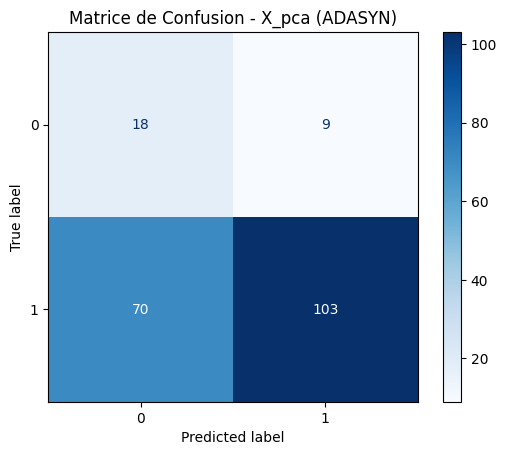


=== Entraînement SVC avec SMOTETomek sur X_pca ===

=== Évaluation SVC avec SMOTETomek sur X_pca ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.1519    0.4444    0.2264        27
           1     0.8760    0.6127    0.7211       173

    accuracy                         0.5900       200
   macro avg     0.5140    0.5286    0.4738       200
weighted avg     0.7783    0.5900    0.6543       200



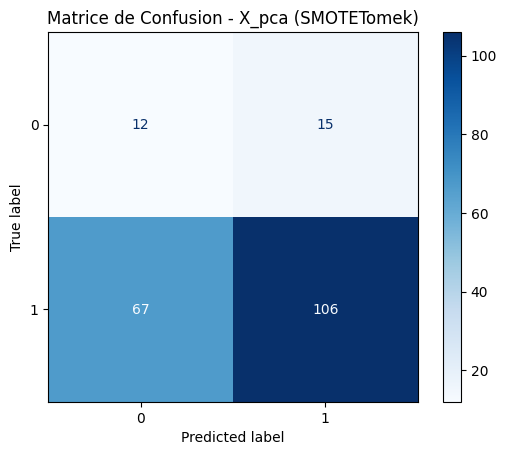


Tableau de comparaison des métriques pour SVC (avec et sans rééchantillonnage) :


,Model,Dataset,Resampling Method,Accuracy,Precision (Class 0),Recall (Class 0),F1-score (Class 0),Precision (Class 1),Recall (Class 1),F1-score (Class 1),Macro Avg Precision,Macro Avg Recall,Macro Avg F1-score
0,SVC,X_normal,None,0.865,0.000000,0.000000,0.000000,0.865000,1.000000,0.927614,0.432500,0.500000,0.463807
1,SVC,X_normal,SMOTE,0.660,0.226667,0.629630,0.333333,0.920000,0.664740,0.771812,0.573333,0.647185,0.552573
2,SVC,X_normal,ADASYN,0.650,0.227848,0.666667,0.339623,0.925620,0.647399,0.761905,0.576734,0.657033,0.550764
3,SVC,X_normal,SMOTETomek,0.660,0.226667,0.629630,0.333333,0.920000,0.664740,0.771812,0.573333,0.647185,0.552573
4,SVC,X_rf,None,0.865,0.000000,0.000000,0.000000,0.865000,1.000000,0.927614,0.432500,0.500000,0.463807
5,SVC,X_rf,SMOTE,0.630,0.223529,0.703704,0.339286,0.930435,0.618497,0.743056,0.576982,0.661100,0.541171
6,SVC,X_rf,ADASYN,0.625,0.220930,0.703704,0.336283,0.929825,0.612717,0.738676,0.575377,0.658210,0.537480
7,SVC,X_rf,SMOTETomek,0.630,0.223529,0.703704,0.339286,0.930435,0.618497,0.743056,0.576982,0.661100,0.541171
8,SVC,X_pca,None,0.865,0.000000,0.000000,0.000000,0.865000,1.000000,0.927614,0.432500,0.500000,0.463807
9,SVC,X_pca,SMOTE,0.590,0.151899,0.444444,0.226415,0.876033,0.612717,0.721088,0.513966,0.528581,0.473752


In [ ]:
# Assure-toi que tes jeux de données splités et standardisés sont prêts :
# Xn_train, yn_train, Xn_test, yn_test
# Xrf_train, yrf_train, Xrf_test, yrf_test
# Xpca_train, ypca_train, Xpca_test, ypca_test

all_svc_metrics = []

# Liste des datasets et leurs correspondants splits
datasets = {
    "X_normal": (Xn_train, yn_train, Xn_test, yn_test),
    "X_rf": (Xrf_train, yrf_train, Xrf_test, yrf_test),
    "X_pca": (Xpca_train, ypca_train, Xpca_test, ypca_test)
}

# Liste des méthodes de rééchantillonnage, incluant 'None'
resampling_methods = ['None', 'SMOTE', 'ADASYN', 'SMOTETomek']

# Boucle à travers les datasets
for dataset_name, (X_train, y_train, X_test, y_test) in datasets.items():
    # Boucle à travers les méthodes de rééchantillonnage
    for method_name in resampling_methods:
        # Appelle la fonction modifiée pour entraîner, évaluer et collecter les métriques
        # Note: Si method_name est 'None', la fonction n'appliquera pas de suréchantillonnage
        # Tu peux ajouter ici une condition si tu veux tester class_weight='balanced' spécifiquement
        # pour le cas 'None' par opposition au comportement par défaut du SVC.
        # Pour simplifier, utilisons ici le paramètre par défaut du SVC quand method_name='None'
        # (ou le paramètre C=0.1, kernel='linear' comme défini dans la fonction)

        metrics = oversample_and_train_svc_and_collect_metrics(
            X_train, y_train, X_test, y_test, method_name, dataset_name
        )
        all_svc_metrics.append(metrics)

# Créer le DataFrame de comparaison pour SVC
svc_comparison_df = pd.DataFrame(all_svc_metrics)

print("\nTableau de comparaison des métriques pour SVC (avec et sans rééchantillonnage) :")
display(svc_comparison_df) # Utilise display pour un meilleur affichage dans Colab


=== Évaluation du modèle sur data_class_res (Normal) ===
Accuracy : 0.8650
F1-score (macro) : 0.4638

Rapport de classification :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.86      1.00      0.93       173

    accuracy                           0.86       200
   macro avg       0.43      0.50      0.46       200
weighted avg       0.75      0.86      0.80       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


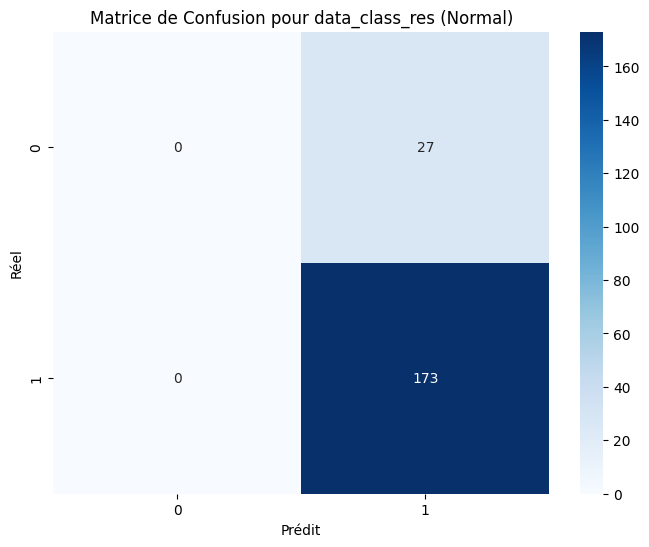


=== Évaluation du modèle sur data_class_res_RF ===
Accuracy : 0.8650
F1-score (macro) : 0.4638

Rapport de classification :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.86      1.00      0.93       173

    accuracy                           0.86       200
   macro avg       0.43      0.50      0.46       200
weighted avg       0.75      0.86      0.80       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


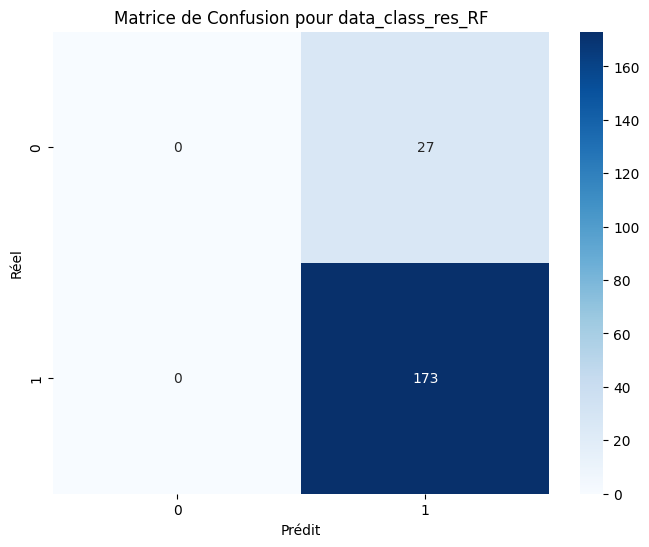


=== Évaluation du modèle sur data_class_res_PCA ===
Accuracy : 0.8650
F1-score (macro) : 0.4638

Rapport de classification :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.86      1.00      0.93       173

    accuracy                           0.86       200
   macro avg       0.43      0.50      0.46       200
weighted avg       0.75      0.86      0.80       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


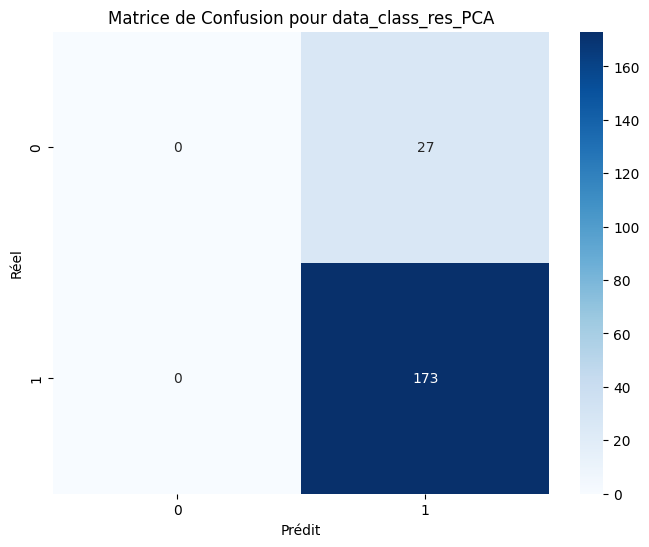

In [ ]:
# Évaluer chaque modèle sur son ensemble de test respectif
evaluate_model(model_normal, Xn_test, yn_test, 'data_class_res (Normal)')
evaluate_model(model_rf, Xrf_test, yrf_test, 'data_class_res_RF')
evaluate_model(model_pca, Xpca_test, ypca_test, 'data_class_res_PCA')

On peut conclure que le modèle prédit seulement la classe 1 (les personnes qui réussissent), et cela est dû au déséquilibre des données.

Ainsi, même si l'accuracy est de 86, ce modèle est un mauvais modèle.

####2.   ***SVC classification amélioration*** *(class_weight='balanced')*


In [ ]:
# Création manuelle des modèles finaux
model_normal = SVC(C=0.1, kernel='linear', class_weight='balanced')
model_rf = SVC(C=0.1, kernel='linear', class_weight='balanced')
model_pca = SVC(C=0.1, kernel='linear', class_weight='balanced')

# Entraînement sur les jeux d'entraînement
model_normal.fit(Xn_train, yn_train)
model_rf.fit(Xrf_train, yrf_train)
model_pca.fit(Xpca_train, ypca_train)


SVC(C=0.1, class_weight='balanced', kernel='linear')


=== Évaluation du modèle sur data_class_res ===
Accuracy : 0.6500
F1-score (macro) : 0.5452

Rapport de classification :
              precision    recall  f1-score   support

           0       0.22      0.63      0.33        27
           1       0.92      0.65      0.76       173

    accuracy                           0.65       200
   macro avg       0.57      0.64      0.55       200
weighted avg       0.82      0.65      0.70       200



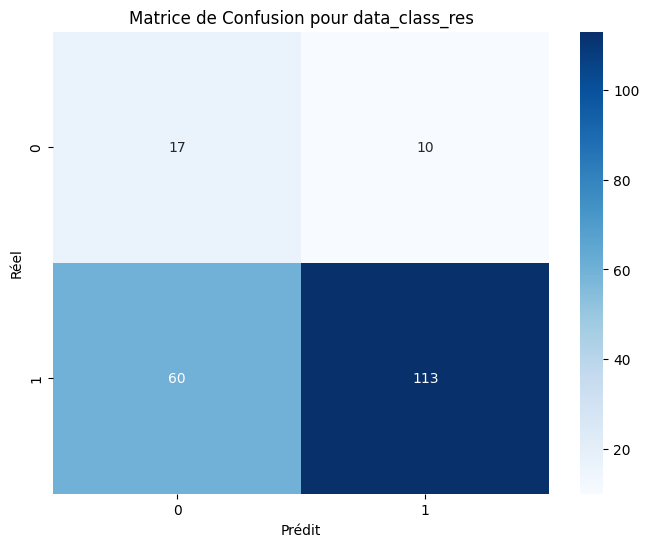


=== Évaluation du modèle sur data_class_res_RF ===
Accuracy : 0.6150
F1-score (macro) : 0.5349

Rapport de classification :
              precision    recall  f1-score   support

           0       0.22      0.74      0.34        27
           1       0.94      0.60      0.73       173

    accuracy                           0.61       200
   macro avg       0.58      0.67      0.53       200
weighted avg       0.84      0.61      0.68       200



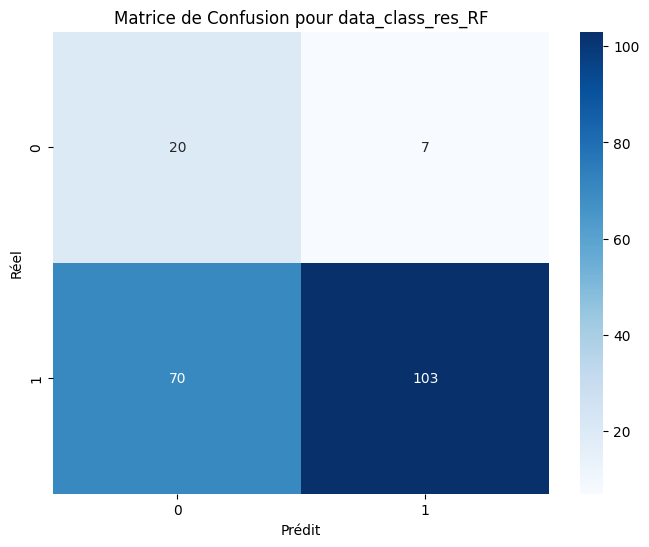


=== Évaluation du modèle sur data_class_res_PCA ===
Accuracy : 0.6050
F1-score (macro) : 0.5179

Rapport de classification :
              precision    recall  f1-score   support

           0       0.20      0.67      0.31        27
           1       0.92      0.60      0.72       173

    accuracy                           0.60       200
   macro avg       0.56      0.63      0.52       200
weighted avg       0.82      0.60      0.67       200



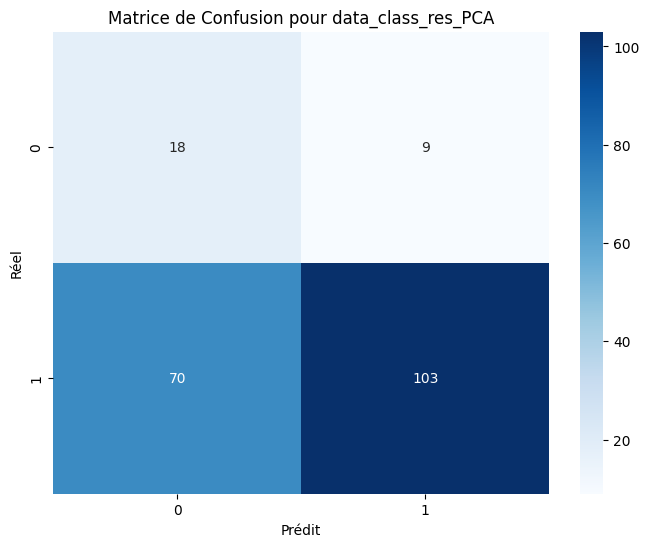

In [ ]:
# Évaluer chaque modèle sur son ensemble de test respectif
evaluate_model(model_normal, Xn_test, yn_test, 'data_class_res')
evaluate_model(model_rf, Xrf_test, yrf_test, 'data_class_res_RF')
evaluate_model(model_pca, Xpca_test, ypca_test, 'data_class_res_PCA')

Dans ce cas, le modèle a commencé à prédire les 0 et les 1, mais avec une accuracy de 0.67.

#### 3.  **SVC classification amélioration 2** (SMOTE_ADASYN_SMOTETOMEK)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt

# Fonction de suréchantillonnage
def oversample_and_train(X_train, y_train, X_test, y_test, method_name, dataset_name):
    if method_name == 'SMOTE':
        sampler = SMOTE(random_state=42)
    elif method_name == 'ADASYN':
        sampler = ADASYN(random_state=42)
    elif method_name == 'SMOTETomek':
        sampler = SMOTETomek(random_state=42)
    else:
        raise ValueError("Méthode inconnue")

    # Suréchantillonnage
    X_res, y_res = sampler.fit_resample(X_train, y_train)

    # Entraîner le modèle SVC
    model = SVC(C=0.1, kernel='linear', class_weight='balanced')

    #model = SVC(C=0.1, kernel='linear', class_weight='balanced')

    model.fit(X_res, y_res)

    # Prédiction sur le jeu de test
    y_pred = model.predict(X_test)

    # Évaluation
    print(f"\n=== SVC avec {method_name} sur {dataset_name} ===")
    print(classification_report(y_test, y_pred, digits=4))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {dataset_name} ({method_name})")
    plt.grid(False)
    plt.show()



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def plot_class_distribution(y_list, titles):
    plt.figure(figsize=(18, 4))

    for i, y in enumerate(y_list):
        plt.subplot(1, len(y_list), i+1)
        sns.barplot(x=list(Counter(y).keys()), y=list(Counter(y).values()), palette='viridis')
        plt.title(titles[i])
        plt.xlabel("Classe")
        plt.ylabel("Nombre d'échantillons")
        plt.xticks([0, 1])
        plt.grid(True)

    plt.tight_layout()
    plt.show()


<ipython-input-83-19c2357ca923>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(Counter(y).keys()), y=list(Counter(y).values()), palette='viridis')
<ipython-input-83-19c2357ca923>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(Counter(y).keys()), y=list(Counter(y).values()), palette='viridis')
<ipython-input-83-19c2357ca923>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(Counter(y).keys()), y=list(Counter(y).values()), palette='viridis')
<ipython-input-83-19c2357ca923>:10: FutureWarning: 

Passing `palette` witho

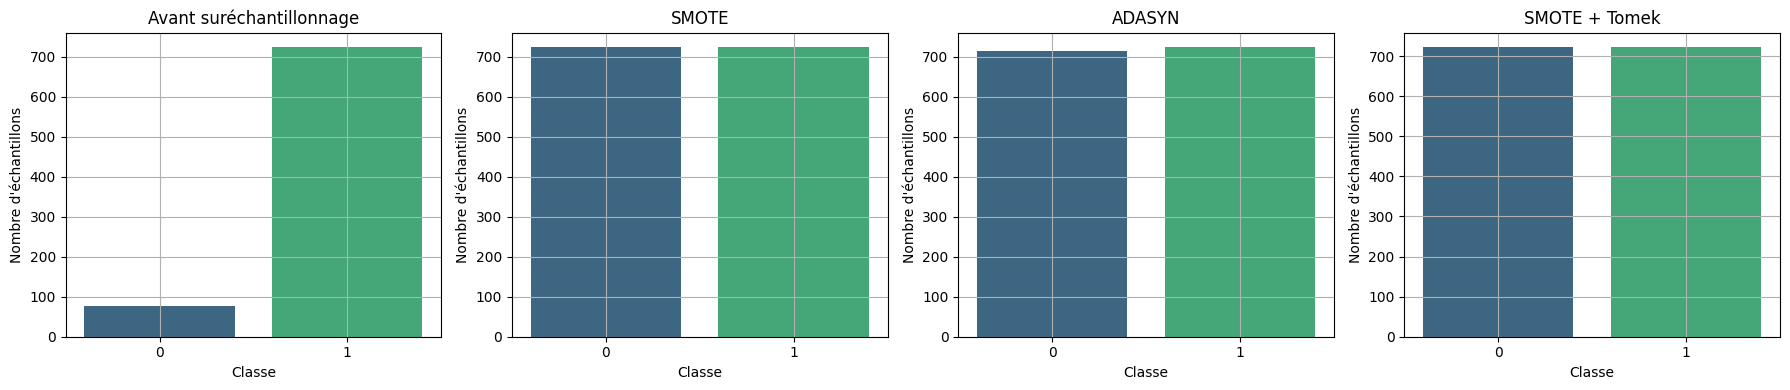

In [ ]:
# Appliquer SMOTE, ADASYN, SMOTE + Tomek
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek

smote = SMOTE(random_state=42)
adasyn = ADASYN(random_state=42)
smote_tomek = SMOTETomek(random_state=42)

X_smote, y_smote = smote.fit_resample(Xn_train, yn_train)
X_adasyn, y_adasyn = adasyn.fit_resample(Xn_train, yn_train)
X_smt, y_smt = smote_tomek.fit_resample(Xn_train, yn_train)

# Affichage de la distribution
plot_class_distribution(
    [yn_train, y_smote, y_adasyn, y_smt],
    ["Avant suréchantillonnage", "SMOTE", "ADASYN", "SMOTE + Tomek"]
)



=== SVC avec SMOTE sur X_normal ===
              precision    recall  f1-score   support

           0     0.2267    0.6296    0.3333        27
           1     0.9200    0.6647    0.7718       173

    accuracy                         0.6600       200
   macro avg     0.5733    0.6472    0.5526       200
weighted avg     0.8264    0.6600    0.7126       200



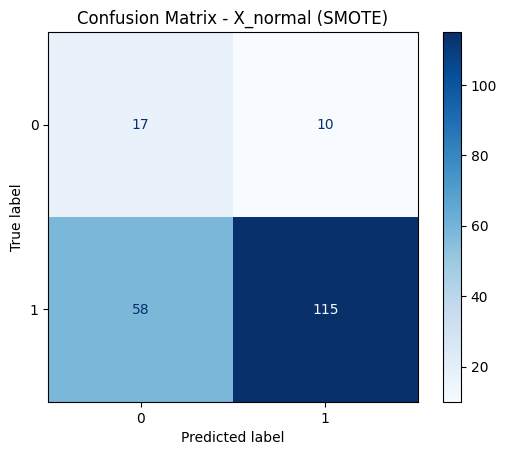


=== SVC avec ADASYN sur X_normal ===
              precision    recall  f1-score   support

           0     0.2278    0.6667    0.3396        27
           1     0.9256    0.6474    0.7619       173

    accuracy                         0.6500       200
   macro avg     0.5767    0.6570    0.5508       200
weighted avg     0.8314    0.6500    0.7049       200



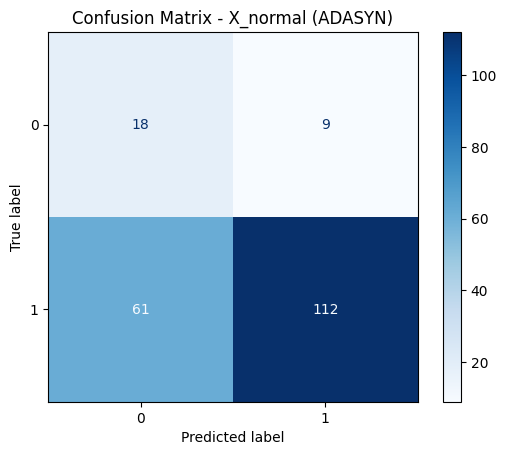


=== SVC avec SMOTETomek sur X_normal ===
              precision    recall  f1-score   support

           0     0.2267    0.6296    0.3333        27
           1     0.9200    0.6647    0.7718       173

    accuracy                         0.6600       200
   macro avg     0.5733    0.6472    0.5526       200
weighted avg     0.8264    0.6600    0.7126       200



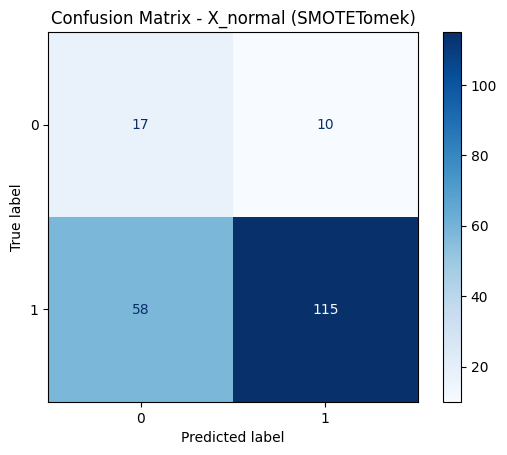

In [ ]:
# === Appliquer pour chaque dataset ===

# 1. Data Normal
for method in ['SMOTE', 'ADASYN', 'SMOTETomek']:
    oversample_and_train(Xn_train, yn_train, Xn_test, yn_test, method, 'X_normal')




=== SVC avec SMOTE sur X_rf ===
              precision    recall  f1-score   support

           0     0.2235    0.7037    0.3393        27
           1     0.9304    0.6185    0.7431       173

    accuracy                         0.6300       200
   macro avg     0.5770    0.6611    0.5412       200
weighted avg     0.8350    0.6300    0.6885       200



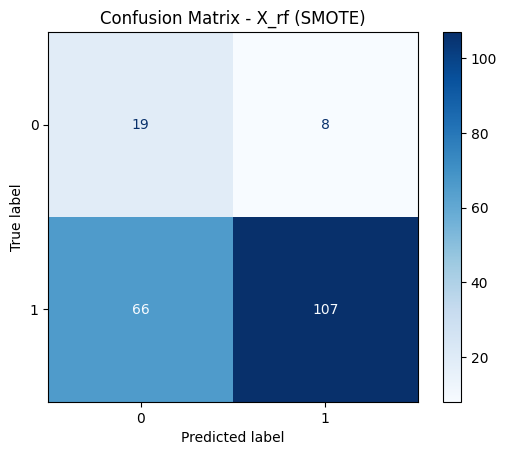


=== SVC avec ADASYN sur X_rf ===
              precision    recall  f1-score   support

           0     0.2209    0.7037    0.3363        27
           1     0.9298    0.6127    0.7387       173

    accuracy                         0.6250       200
   macro avg     0.5754    0.6582    0.5375       200
weighted avg     0.8341    0.6250    0.6844       200



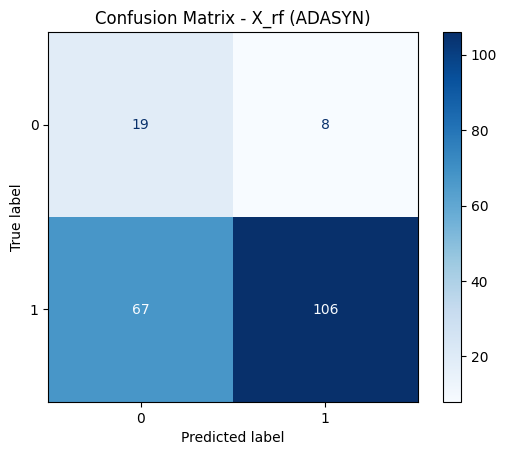


=== SVC avec SMOTETomek sur X_rf ===
              precision    recall  f1-score   support

           0     0.2235    0.7037    0.3393        27
           1     0.9304    0.6185    0.7431       173

    accuracy                         0.6300       200
   macro avg     0.5770    0.6611    0.5412       200
weighted avg     0.8350    0.6300    0.6885       200



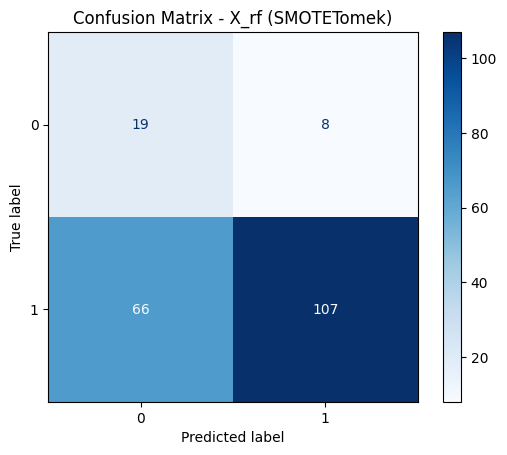

In [ ]:
# 2. Data RF
for method in ['SMOTE', 'ADASYN', 'SMOTETomek']:
    oversample_and_train(Xrf_train, yrf_train, Xrf_test, yrf_test, method, 'X_rf')


=== SVC avec SMOTE sur X_pca ===
              precision    recall  f1-score   support

           0     0.1519    0.4444    0.2264        27
           1     0.8760    0.6127    0.7211       173

    accuracy                         0.5900       200
   macro avg     0.5140    0.5286    0.4738       200
weighted avg     0.7783    0.5900    0.6543       200



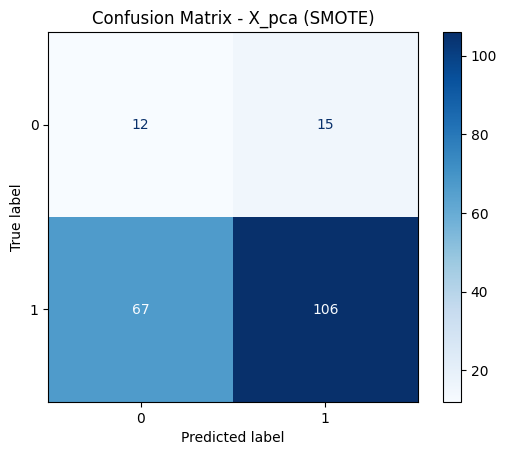


=== SVC avec ADASYN sur X_pca ===
              precision    recall  f1-score   support

           0     0.2045    0.6667    0.3130        27
           1     0.9196    0.5954    0.7228       173

    accuracy                         0.6050       200
   macro avg     0.5621    0.6310    0.5179       200
weighted avg     0.8231    0.6050    0.6675       200



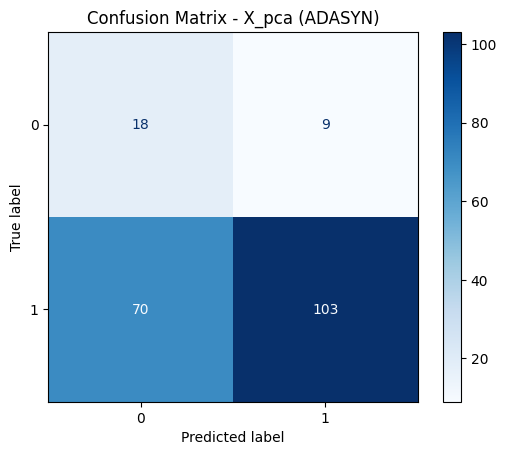


=== SVC avec SMOTETomek sur X_pca ===
              precision    recall  f1-score   support

           0     0.1519    0.4444    0.2264        27
           1     0.8760    0.6127    0.7211       173

    accuracy                         0.5900       200
   macro avg     0.5140    0.5286    0.4738       200
weighted avg     0.7783    0.5900    0.6543       200



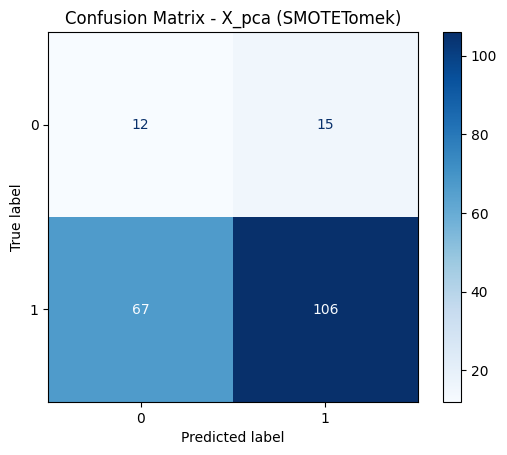

In [ ]:
# 3. Data PCA
for method in ['SMOTE', 'ADASYN', 'SMOTETomek']:
    oversample_and_train(Xpca_train, ypca_train, Xpca_test, ypca_test, method, 'X_pca')

modèle SVC avec SMOTE prédit principalement la classe majoritaire (classe 1). Il a une bonne précision pour cette classe (quand il dit que c'est classe 1, il a souvent raison), mais il a beaucoup de mal à identifier correctement la classe minoritaire (classe 0). Sa précision pour la classe 0 est très faible, ce qui signifie que lorsqu'il prédit "classe 0", il se trompe souvent. Le SMOTE a permis au modèle de commencer à prédire la classe 0, mais sa performance globale, particulièrement pour la classe minoritaire, est médiocre. L'accuracy globale de 66% cache une performance très inégale entre les classes. C'est un mauvais modèle si l'objectif est de bien identifier les deux classes.

### Logistic Regression

#### LR avec SMOTE_ADASYN_SMOTETOMEK


=== Logistic Regression avec SMOTE sur X_normal ===
              precision    recall  f1-score   support

           0     0.2424    0.5926    0.3441        27
           1     0.9179    0.7110    0.8013       173

    accuracy                         0.6950       200
   macro avg     0.5802    0.6518    0.5727       200
weighted avg     0.8267    0.6950    0.7396       200



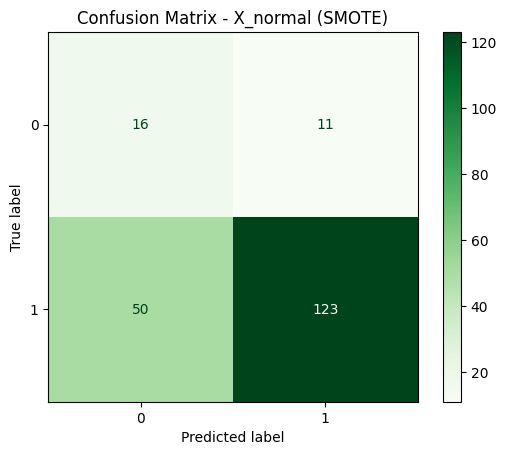


=== Logistic Regression avec ADASYN sur X_normal ===
              precision    recall  f1-score   support

           0     0.2535    0.6667    0.3673        27
           1     0.9302    0.6936    0.7947       173

    accuracy                         0.6900       200
   macro avg     0.5919    0.6802    0.5810       200
weighted avg     0.8389    0.6900    0.7370       200



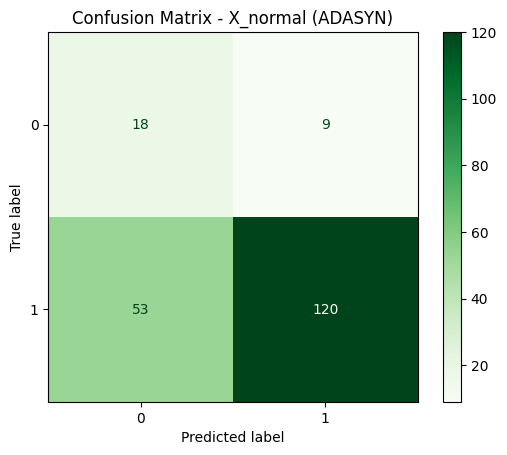


=== Logistic Regression avec SMOTETomek sur X_normal ===
              precision    recall  f1-score   support

           0     0.2424    0.5926    0.3441        27
           1     0.9179    0.7110    0.8013       173

    accuracy                         0.6950       200
   macro avg     0.5802    0.6518    0.5727       200
weighted avg     0.8267    0.6950    0.7396       200



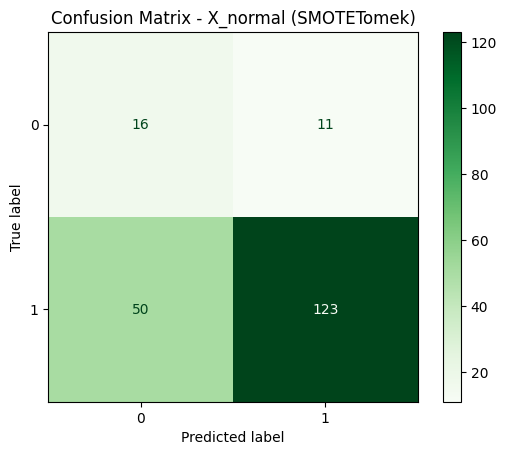


=== Logistic Regression avec SMOTE sur X_rf ===
              precision    recall  f1-score   support

           0     0.2267    0.6296    0.3333        27
           1     0.9200    0.6647    0.7718       173

    accuracy                         0.6600       200
   macro avg     0.5733    0.6472    0.5526       200
weighted avg     0.8264    0.6600    0.7126       200



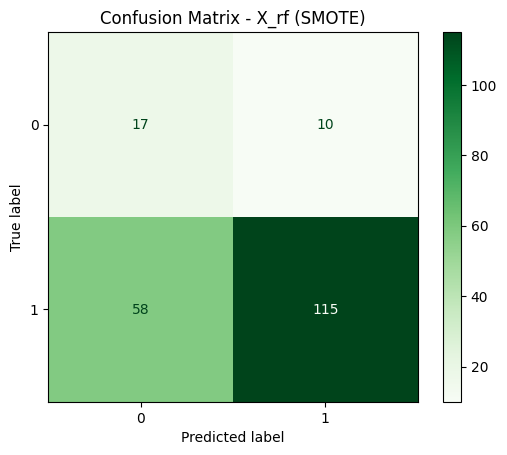


=== Logistic Regression avec ADASYN sur X_rf ===
              precision    recall  f1-score   support

           0     0.2286    0.5926    0.3299        27
           1     0.9154    0.6879    0.7855       173

    accuracy                         0.6750       200
   macro avg     0.5720    0.6402    0.5577       200
weighted avg     0.8227    0.6750    0.7240       200



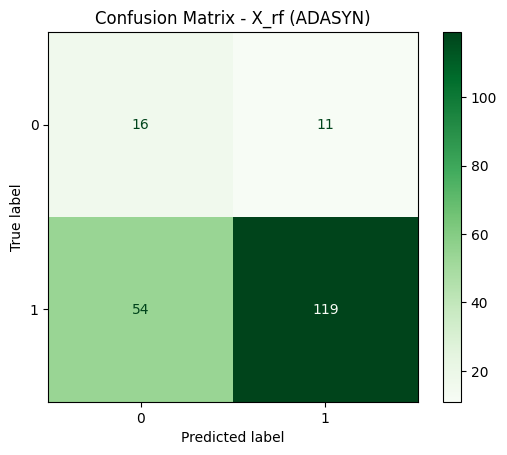


=== Logistic Regression avec SMOTETomek sur X_rf ===
              precision    recall  f1-score   support

           0     0.2267    0.6296    0.3333        27
           1     0.9200    0.6647    0.7718       173

    accuracy                         0.6600       200
   macro avg     0.5733    0.6472    0.5526       200
weighted avg     0.8264    0.6600    0.7126       200



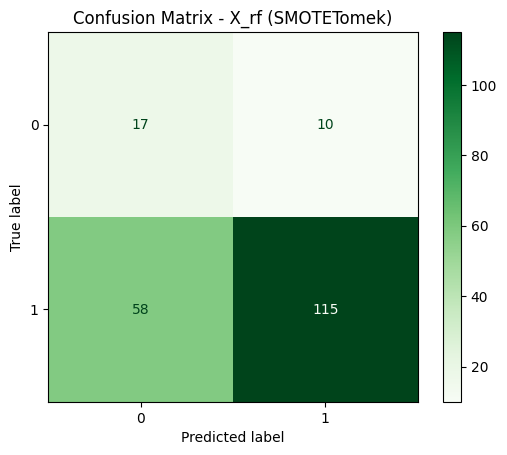


=== Logistic Regression avec SMOTE sur X_pca ===
              precision    recall  f1-score   support

           0     0.1757    0.4815    0.2574        27
           1     0.8889    0.6474    0.7492       173

    accuracy                         0.6250       200
   macro avg     0.5323    0.5644    0.5033       200
weighted avg     0.7926    0.6250    0.6828       200



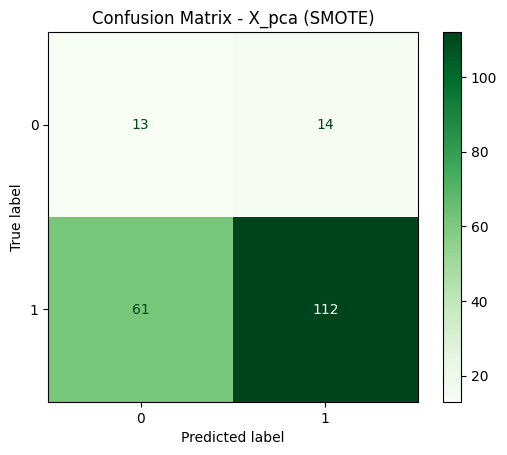


=== Logistic Regression avec ADASYN sur X_pca ===
              precision    recall  f1-score   support

           0     0.1600    0.4444    0.2353        27
           1     0.8800    0.6358    0.7383       173

    accuracy                         0.6100       200
   macro avg     0.5200    0.5401    0.4868       200
weighted avg     0.7828    0.6100    0.6704       200



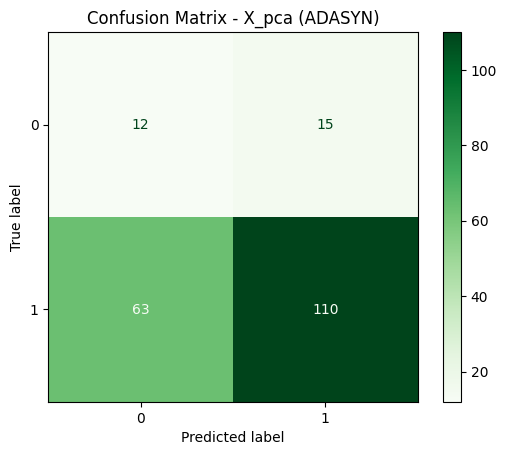


=== Logistic Regression avec SMOTETomek sur X_pca ===
              precision    recall  f1-score   support

           0     0.1757    0.4815    0.2574        27
           1     0.8889    0.6474    0.7492       173

    accuracy                         0.6250       200
   macro avg     0.5323    0.5644    0.5033       200
weighted avg     0.7926    0.6250    0.6828       200



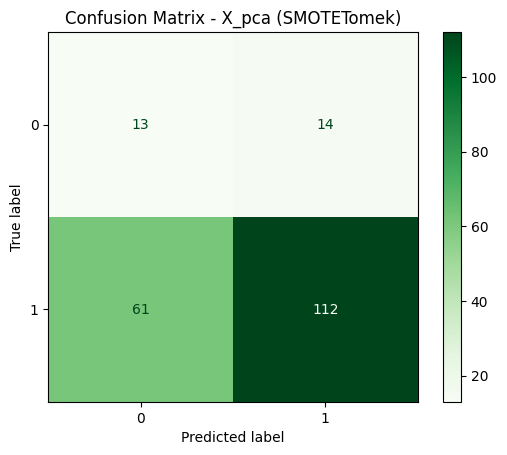

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Fonction d'entraînement et évaluation
def oversample_and_train_logreg(X_train, y_train, X_test, y_test, method_name, dataset_name):
    if method_name == 'SMOTE':
        sampler = SMOTE(random_state=42)
    elif method_name == 'ADASYN':
        sampler = ADASYN(random_state=42)
    elif method_name == 'SMOTETomek':
        sampler = SMOTETomek(random_state=42)
    else:
        raise ValueError("Méthode inconnue")

    # Suréchantillonnage
    X_res, y_res = sampler.fit_resample(X_train, y_train)

    # Modèle Logistic Regression
    model = LogisticRegression(solver='liblinear', random_state=42)
    model.fit(X_res, y_res)

    # Prédiction
    y_pred = model.predict(X_test)

    # Évaluation
    print(f"\n=== Logistic Regression avec {method_name} sur {dataset_name} ===")
    print(classification_report(y_test, y_pred, digits=4))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Greens")
    plt.title(f"Confusion Matrix - {dataset_name} ({method_name})")
    plt.grid(False)
    plt.show()

# === Application aux 3 jeux de données ===

# Dataset 1 : X_normal
for method in ['SMOTE', 'ADASYN', 'SMOTETomek']:
    oversample_and_train_logreg(Xn_train, yn_train, Xn_test, yn_test, method, 'X_normal')

# Dataset 2 : X_rf
for method in ['SMOTE', 'ADASYN', 'SMOTETomek']:
    oversample_and_train_logreg(Xrf_train, yrf_train, Xrf_test, yrf_test, method, 'X_rf')

# Dataset 3 : X_pca
for method in ['SMOTE', 'ADASYN', 'SMOTETomek']:
    oversample_and_train_logreg(Xpca_train, ypca_train, Xpca_test, ypca_test, method, 'X_pca')


#### LR avec (SMOTE_ADASYN_SMOTETOMEK) + class_weight='balanced'

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt

# Fonction d'entraînement et d'évaluation
def oversample_and_train_logreg_balanced(X_train, y_train, X_test, y_test, method_name, dataset_name):
    if method_name == 'SMOTE':
        sampler = SMOTE(random_state=42)
    elif method_name == 'ADASYN':
        sampler = ADASYN(random_state=42)
    elif method_name == 'SMOTETomek':
        sampler = SMOTETomek(random_state=42)
    else:
        raise ValueError("Méthode inconnue")

    # Appliquer la méthode de rééchantillonnage
    X_res, y_res = sampler.fit_resample(X_train, y_train)

    # Entraînement du modèle Logistic Regression équilibré
    model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
    model.fit(X_res, y_res)

    # Prédiction sur les données de test
    y_pred = model.predict(X_test)

    # Affichage des résultats
    print(f"\n=== Logistic Regression (balanced) avec {method_name} sur {dataset_name} ===")
    print(classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="BuPu")
    plt.title(f"Confusion Matrix - {dataset_name} ({method_name})")
    plt.grid(False)
    plt.show()



=== Logistic Regression (balanced) avec SMOTE sur X_normal ===
              precision    recall  f1-score   support

           0     0.2424    0.5926    0.3441        27
           1     0.9179    0.7110    0.8013       173

    accuracy                         0.6950       200
   macro avg     0.5802    0.6518    0.5727       200
weighted avg     0.8267    0.6950    0.7396       200



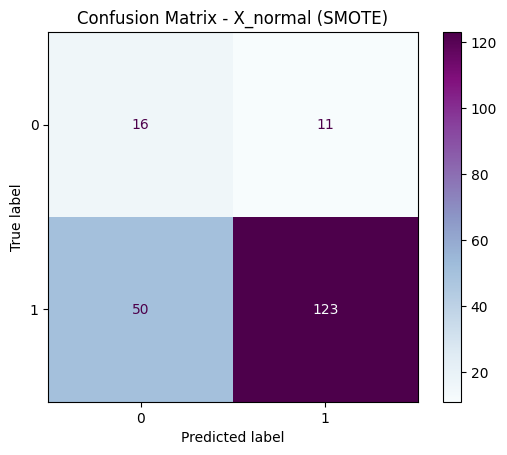


=== Logistic Regression (balanced) avec ADASYN sur X_normal ===
              precision    recall  f1-score   support

           0     0.2535    0.6667    0.3673        27
           1     0.9302    0.6936    0.7947       173

    accuracy                         0.6900       200
   macro avg     0.5919    0.6802    0.5810       200
weighted avg     0.8389    0.6900    0.7370       200



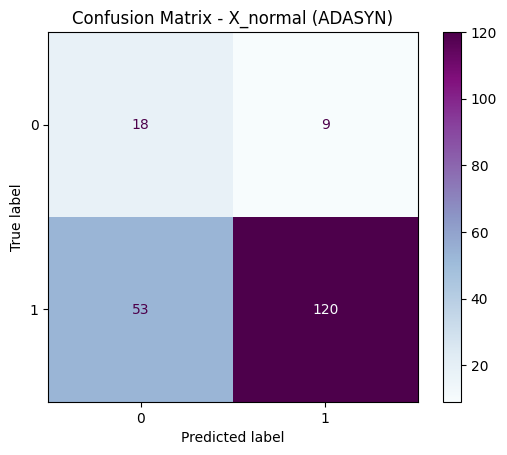


=== Logistic Regression (balanced) avec SMOTETomek sur X_normal ===
              precision    recall  f1-score   support

           0     0.2424    0.5926    0.3441        27
           1     0.9179    0.7110    0.8013       173

    accuracy                         0.6950       200
   macro avg     0.5802    0.6518    0.5727       200
weighted avg     0.8267    0.6950    0.7396       200



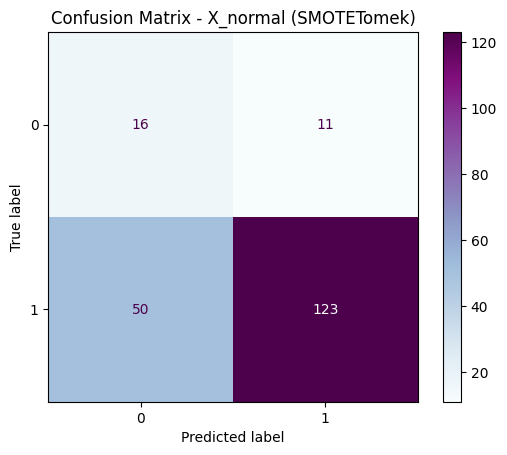


=== Logistic Regression (balanced) avec SMOTE sur X_rf ===
              precision    recall  f1-score   support

           0     0.2267    0.6296    0.3333        27
           1     0.9200    0.6647    0.7718       173

    accuracy                         0.6600       200
   macro avg     0.5733    0.6472    0.5526       200
weighted avg     0.8264    0.6600    0.7126       200



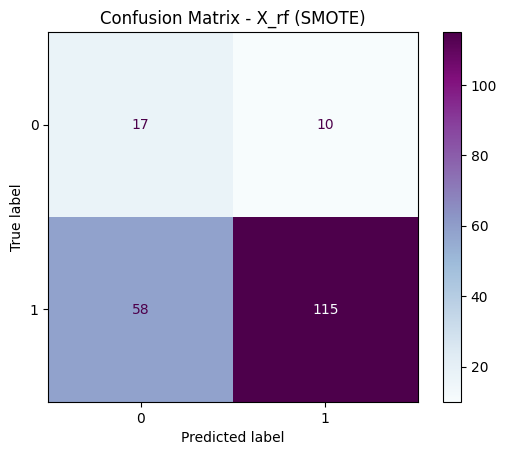


=== Logistic Regression (balanced) avec ADASYN sur X_rf ===
              precision    recall  f1-score   support

           0     0.2237    0.6296    0.3301        27
           1     0.9194    0.6590    0.7677       173

    accuracy                         0.6550       200
   macro avg     0.5715    0.6443    0.5489       200
weighted avg     0.8254    0.6550    0.7086       200



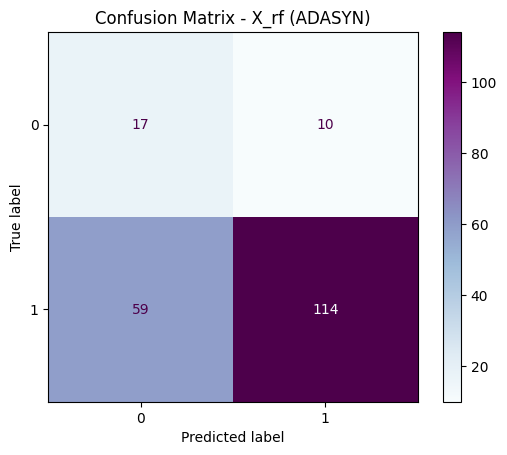


=== Logistic Regression (balanced) avec SMOTETomek sur X_rf ===
              precision    recall  f1-score   support

           0     0.2267    0.6296    0.3333        27
           1     0.9200    0.6647    0.7718       173

    accuracy                         0.6600       200
   macro avg     0.5733    0.6472    0.5526       200
weighted avg     0.8264    0.6600    0.7126       200



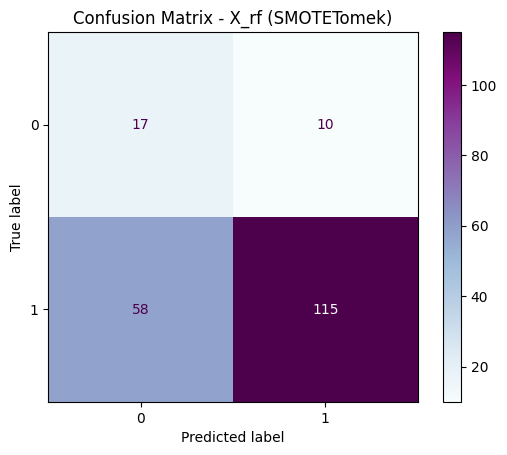


=== Logistic Regression (balanced) avec SMOTE sur X_pca ===
              precision    recall  f1-score   support

           0     0.1757    0.4815    0.2574        27
           1     0.8889    0.6474    0.7492       173

    accuracy                         0.6250       200
   macro avg     0.5323    0.5644    0.5033       200
weighted avg     0.7926    0.6250    0.6828       200



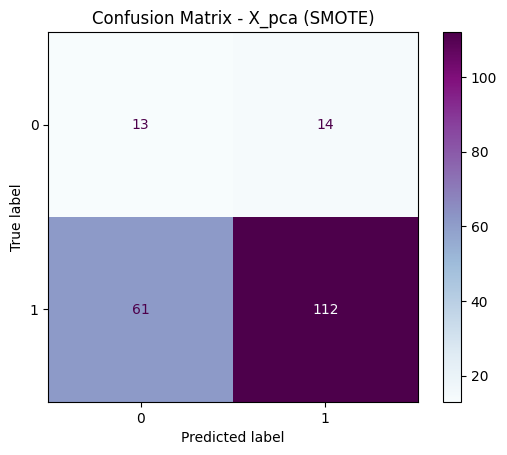


=== Logistic Regression (balanced) avec ADASYN sur X_pca ===
              precision    recall  f1-score   support

           0     0.1600    0.4444    0.2353        27
           1     0.8800    0.6358    0.7383       173

    accuracy                         0.6100       200
   macro avg     0.5200    0.5401    0.4868       200
weighted avg     0.7828    0.6100    0.6704       200



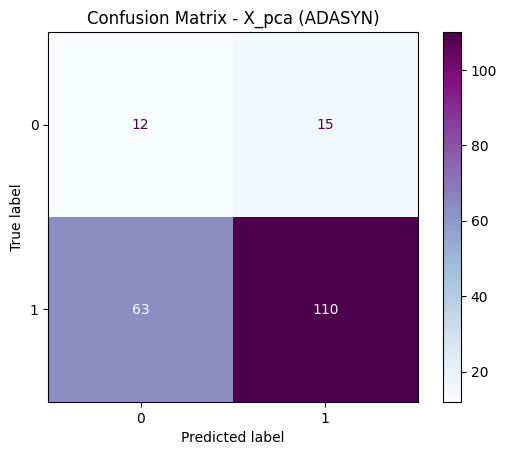


=== Logistic Regression (balanced) avec SMOTETomek sur X_pca ===
              precision    recall  f1-score   support

           0     0.1757    0.4815    0.2574        27
           1     0.8889    0.6474    0.7492       173

    accuracy                         0.6250       200
   macro avg     0.5323    0.5644    0.5033       200
weighted avg     0.7926    0.6250    0.6828       200



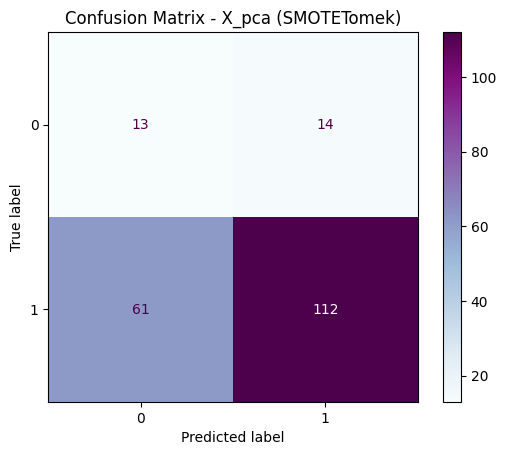

In [ ]:
# Dataset 1 : X_normal
for method in ['SMOTE', 'ADASYN', 'SMOTETomek']:
    oversample_and_train_logreg_balanced(Xn_train, yn_train, Xn_test, yn_test, method, 'X_normal')

# Dataset 2 : X_rf
for method in ['SMOTE', 'ADASYN', 'SMOTETomek']:
    oversample_and_train_logreg_balanced(Xrf_train, yrf_train, Xrf_test, yrf_test, method, 'X_rf')

# Dataset 3 : X_pca
for method in ['SMOTE', 'ADASYN', 'SMOTETomek']:
    oversample_and_train_logreg_balanced(Xpca_train, ypca_train, Xpca_test, ypca_test, method, 'X_pca')


### NAIVE BAYES

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def find_best_params_naive_bayes(X_train, y_train):
    """
    Recherche des meilleurs paramètres pour GaussianNB via GridSearchCV.
    """
    print("Recherche des meilleurs paramètres pour Naive Bayes...")

    param_grid = {
        'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]
    }

    gnb = GaussianNB()
    grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    print(f"Meilleurs paramètres trouvés: {grid_search.best_params_}")
    print(f"Meilleur score de validation: {grid_search.best_score_:.4f}")

    return grid_search.best_estimator_

def evaluate_model(model, X_test, y_test, dataset_name=''):
    """
    Évalue et affiche le rapport de classification et la matrice de confusion.
    """
    y_pred = model.predict(X_test)

    print(f"\nÉvaluation du modèle Naive Bayes sur {dataset_name} :")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Matrice de confusion - {dataset_name}')
    plt.show()

Recherche des meilleurs paramètres pour Naive Bayes...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Meilleurs paramètres trouvés: {'var_smoothing': 1e-09}
Meilleur score de validation: 0.8787

Évaluation du modèle Naive Bayes sur Données normales :
              precision    recall  f1-score   support

           0       0.25      0.15      0.19        27
           1       0.88      0.93      0.90       173

    accuracy                           0.82       200
   macro avg       0.56      0.54      0.54       200
weighted avg       0.79      0.82      0.81       200



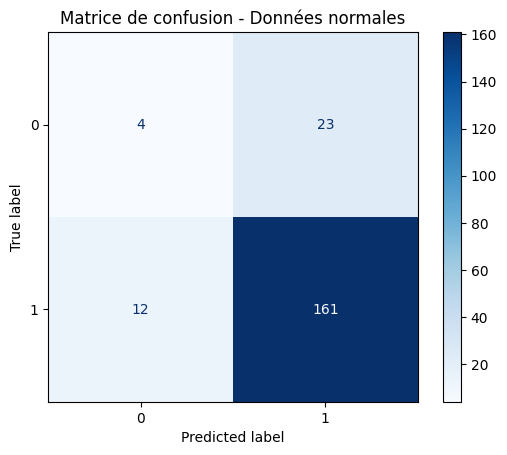

In [ ]:
# 2. Trouver le meilleur modèle
best_nb_model = find_best_params_naive_bayes(Xn_train, yn_train)  # Ici Xn_train, yn_train = données normales entraînement

# 3. Évaluer sur le test
evaluate_model(best_nb_model, Xn_test, yn_test, 'Données normales')

#### NB normal


=== Naive Bayes sur X_normal (sans rééquilibrage, var_smoothing=1e-09) ===
              precision    recall  f1-score   support

           0     0.2500    0.1481    0.1860        27
           1     0.8750    0.9306    0.9020       173

    accuracy                         0.8250       200
   macro avg     0.5625    0.5394    0.5440       200
weighted avg     0.7906    0.8250    0.8053       200



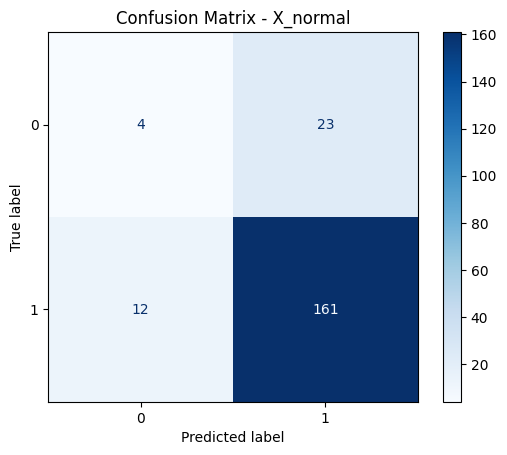


=== Naive Bayes sur X_rf (sans rééquilibrage, var_smoothing=1e-09) ===
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        27
           1     0.8650    1.0000    0.9276       173

    accuracy                         0.8650       200
   macro avg     0.4325    0.5000    0.4638       200
weighted avg     0.7482    0.8650    0.8024       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


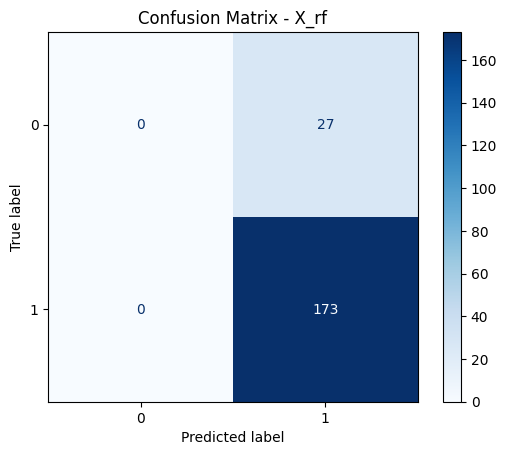


=== Naive Bayes sur X_pca (sans rééquilibrage, var_smoothing=1e-09) ===
              precision    recall  f1-score   support

           0     1.0000    0.1111    0.2000        27
           1     0.8782    1.0000    0.9351       173

    accuracy                         0.8800       200
   macro avg     0.9391    0.5556    0.5676       200
weighted avg     0.8946    0.8800    0.8359       200



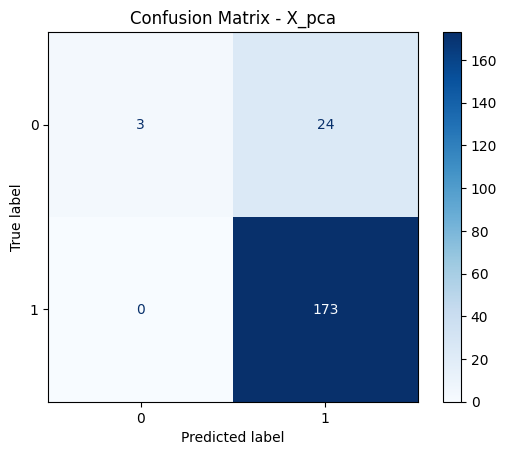

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_naive_bayes(X_train, y_train, X_test, y_test, dataset_name):
    # Création du modèle avec le paramètre var_smoothing spécifié
    model = GaussianNB(var_smoothing=1e-09)

    # Entraînement
    model.fit(X_train, y_train)

    # Prédiction
    y_pred = model.predict(X_test)

    # Évaluation
    print(f"\n=== Naive Bayes sur {dataset_name} (sans rééquilibrage, var_smoothing=1e-09) ===")
    print(classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {dataset_name}")
    plt.grid(False)
    plt.show()

# Appliquer sur les 3 datasets normaux
evaluate_naive_bayes(Xn_train, yn_train, Xn_test, yn_test, "X_normal")
evaluate_naive_bayes(Xrf_train, yrf_train, Xrf_test, yrf_test, "X_rf")
evaluate_naive_bayes(Xpca_train, ypca_train, Xpca_test, ypca_test, "X_pca")

#### NB avec (SMOTE_ADASYN_SMOTETOMEK)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt

# Fonction générique pour entraîner + tester Naive Bayes avec une méthode de rééquilibrage
def balance_and_train_nb(X_train, y_train, X_test, y_test, method_name, dataset_name):
    # Choisir la méthode de rééquilibrage
    if method_name == 'SMOTE':
        sampler = SMOTE(random_state=42)
    elif method_name == 'ADASYN':
        sampler = ADASYN(random_state=42)
    elif method_name == 'SMOTETomek':
        sampler = SMOTETomek(random_state=42)
    else:
        raise ValueError("Méthode inconnue : SMOTE, ADASYN ou SMOTETomek")

    # Rééquilibrage
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

    # Créer le modèle Naive Bayes
    model = GaussianNB(var_smoothing=1e-09)
    model.fit(X_resampled, y_resampled)

    # Évaluation sur le test
    y_pred = model.predict(X_test)

    print(f"\n=== Naive Bayes avec {method_name} sur {dataset_name} ===")
    print(classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {dataset_name} ({method_name})")
    plt.grid(False)
    plt.show()




=== Naive Bayes avec SMOTE sur X_normal ===
              precision    recall  f1-score   support

           0     0.2131    0.4815    0.2955        27
           1     0.8993    0.7225    0.8013       173

    accuracy                         0.6900       200
   macro avg     0.5562    0.6020    0.5484       200
weighted avg     0.8066    0.6900    0.7330       200



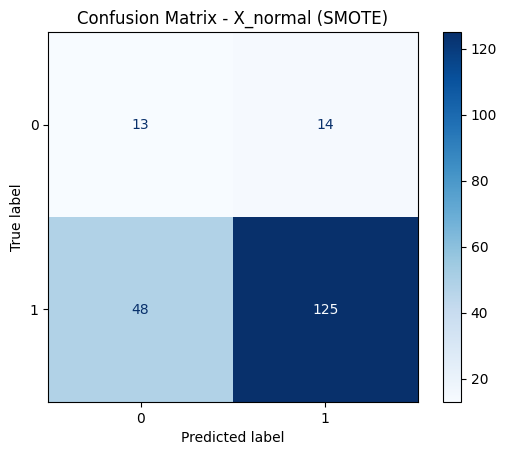


=== Naive Bayes avec ADASYN sur X_normal ===
              precision    recall  f1-score   support

           0     0.2113    0.5556    0.3061        27
           1     0.9070    0.6763    0.7748       173

    accuracy                         0.6600       200
   macro avg     0.5591    0.6159    0.5405       200
weighted avg     0.8131    0.6600    0.7116       200



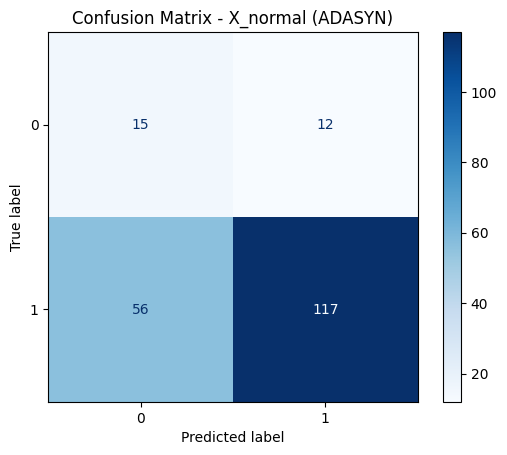


=== Naive Bayes avec SMOTETomek sur X_normal ===
              precision    recall  f1-score   support

           0     0.2131    0.4815    0.2955        27
           1     0.8993    0.7225    0.8013       173

    accuracy                         0.6900       200
   macro avg     0.5562    0.6020    0.5484       200
weighted avg     0.8066    0.6900    0.7330       200



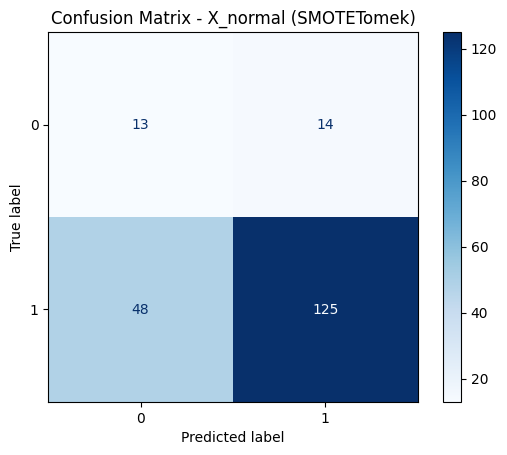


=== Naive Bayes avec SMOTE sur X_rf ===
              precision    recall  f1-score   support

           0     0.2169    0.6667    0.3273        27
           1     0.9231    0.6243    0.7448       173

    accuracy                         0.6300       200
   macro avg     0.5700    0.6455    0.5361       200
weighted avg     0.8277    0.6300    0.6885       200



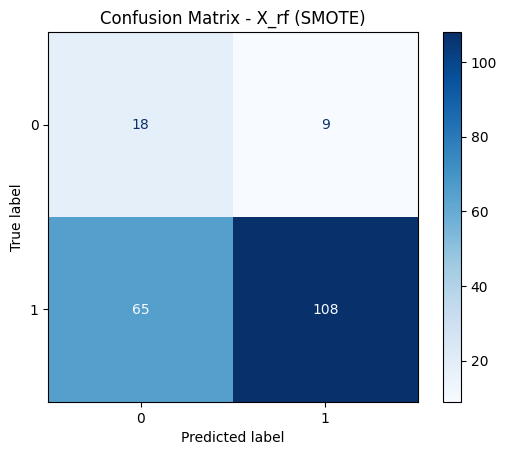


=== Naive Bayes avec ADASYN sur X_rf ===
              precision    recall  f1-score   support

           0     0.2169    0.6667    0.3273        27
           1     0.9231    0.6243    0.7448       173

    accuracy                         0.6300       200
   macro avg     0.5700    0.6455    0.5361       200
weighted avg     0.8277    0.6300    0.6885       200



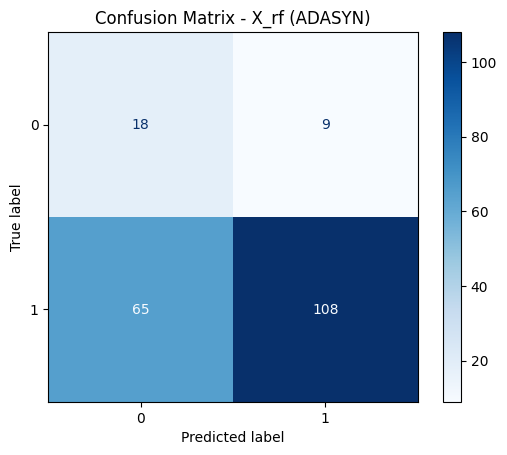


=== Naive Bayes avec SMOTETomek sur X_rf ===
              precision    recall  f1-score   support

           0     0.2169    0.6667    0.3273        27
           1     0.9231    0.6243    0.7448       173

    accuracy                         0.6300       200
   macro avg     0.5700    0.6455    0.5361       200
weighted avg     0.8277    0.6300    0.6885       200



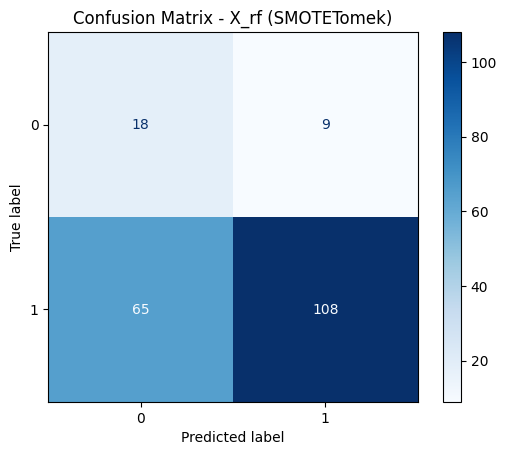


=== Naive Bayes avec SMOTE sur X_pca ===
              precision    recall  f1-score   support

           0     0.1944    0.5185    0.2828        27
           1     0.8984    0.6647    0.7641       173

    accuracy                         0.6450       200
   macro avg     0.5464    0.5916    0.5235       200
weighted avg     0.8034    0.6450    0.6991       200



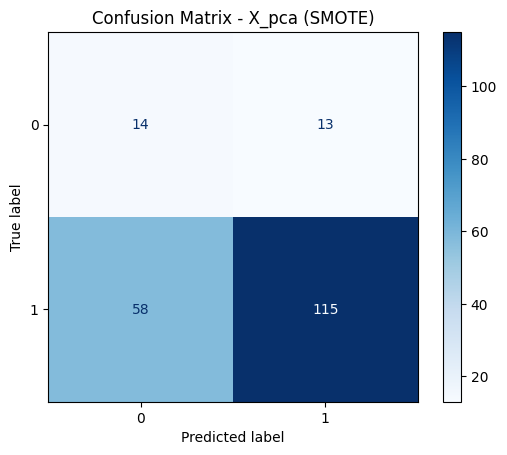


=== Naive Bayes avec ADASYN sur X_pca ===
              precision    recall  f1-score   support

           0     0.2048    0.6296    0.3091        27
           1     0.9145    0.6185    0.7379       173

    accuracy                         0.6200       200
   macro avg     0.5597    0.6241    0.5235       200
weighted avg     0.8187    0.6200    0.6800       200



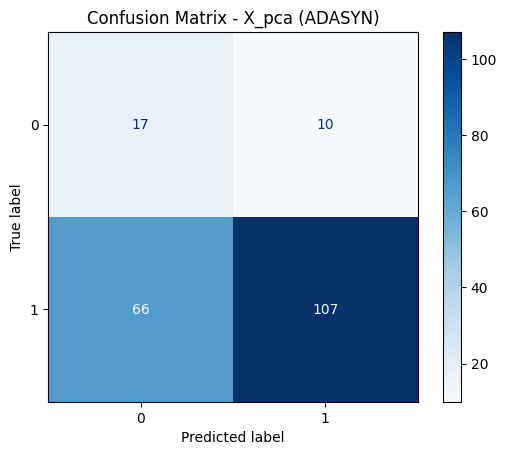


=== Naive Bayes avec SMOTETomek sur X_pca ===
              precision    recall  f1-score   support

           0     0.1944    0.5185    0.2828        27
           1     0.8984    0.6647    0.7641       173

    accuracy                         0.6450       200
   macro avg     0.5464    0.5916    0.5235       200
weighted avg     0.8034    0.6450    0.6991       200



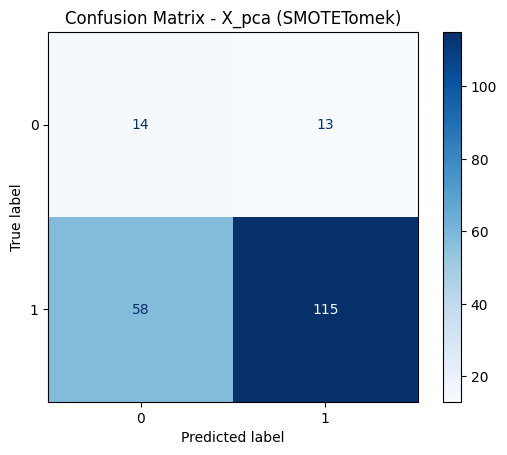

In [ ]:
# ========== APPLICATION À TES 3 DATASETS ==========

# Dataset 1 : Normal
for method in ['SMOTE', 'ADASYN', 'SMOTETomek']:
    balance_and_train_nb(Xn_train, yn_train, Xn_test, yn_test, method, "X_normal")

# Dataset 2 : RF
for method in ['SMOTE', 'ADASYN', 'SMOTETomek']:
    balance_and_train_nb(Xrf_train, yrf_train, Xrf_test, yrf_test, method, "X_rf")

# Dataset 3 : PCA
for method in ['SMOTE', 'ADASYN', 'SMOTETomek']:
    balance_and_train_nb(Xpca_train, ypca_train, Xpca_test, ypca_test, method, "X_pca")

###Decision Tree

#### DT normal


--- Decision Tree (CART) - Normal ---
Classification report:
               precision    recall  f1-score   support

           0     0.2075    0.4074    0.2750        27
           1     0.8912    0.7572    0.8187       173

    accuracy                         0.7100       200
   macro avg     0.5494    0.5823    0.5469       200
weighted avg     0.7989    0.7100    0.7453       200



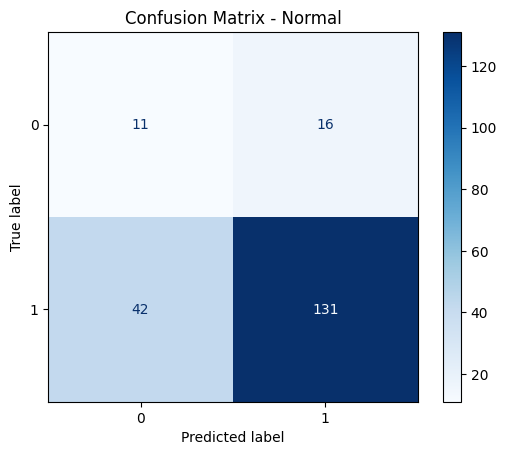


--- Decision Tree (CART) - RF ---
Classification report:
               precision    recall  f1-score   support

           0     0.1842    0.5185    0.2718        27
           1     0.8952    0.6416    0.7475       173

    accuracy                         0.6250       200
   macro avg     0.5397    0.5801    0.5097       200
weighted avg     0.7992    0.6250    0.6833       200



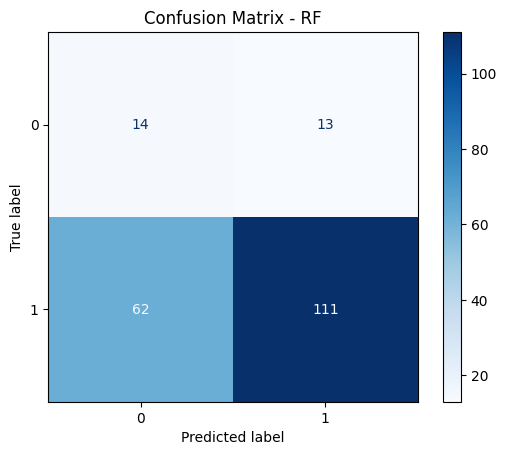


--- Decision Tree (CART) - PCA ---
Classification report:
               precision    recall  f1-score   support

           0     0.2157    0.4074    0.2821        27
           1     0.8926    0.7688    0.8261       173

    accuracy                         0.7200       200
   macro avg     0.5542    0.5881    0.5541       200
weighted avg     0.8012    0.7200    0.7526       200



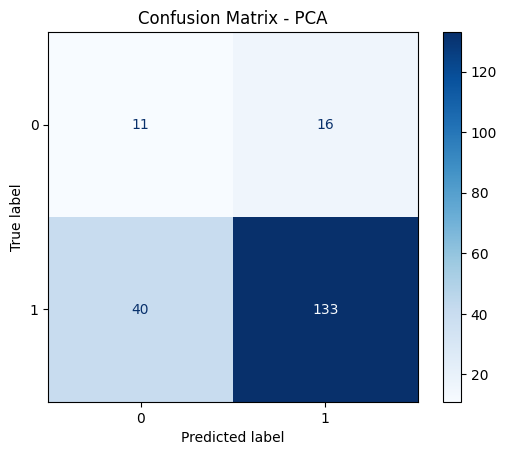

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def run_decision_tree(X_train, y_train, X_test, y_test, dataset_name):
    print(f"\n--- Decision Tree (CART) - {dataset_name} ---")

    # Création du modèle avec pondération des classes
    model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

    # Entraînement
    model.fit(X_train, y_train)

    # Prédiction
    y_pred = model.predict(X_test)

    # Évaluation
    print("Classification report:\n", classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {dataset_name}")
    plt.grid(False)
    plt.show()

# Exemple d’appel sur tes datasets déjà split et standardisés

run_decision_tree(Xn_train, yn_train, Xn_test, yn_test, "Normal")
run_decision_tree(Xrf_train, yrf_train, Xrf_test, yrf_test, "RF")
run_decision_tree(Xpca_train, ypca_train, Xpca_test, ypca_test, "PCA")


#### DT avec SMOTE_ADASYN_SMOTETOMEK


--- Decision Tree avec SMOTE - Normal ---
              precision    recall  f1-score   support

           0     0.2500    0.1852    0.2128        27
           1     0.8778    0.9133    0.8952       173

    accuracy                         0.8150       200
   macro avg     0.5639    0.5492    0.5540       200
weighted avg     0.7930    0.8150    0.8031       200



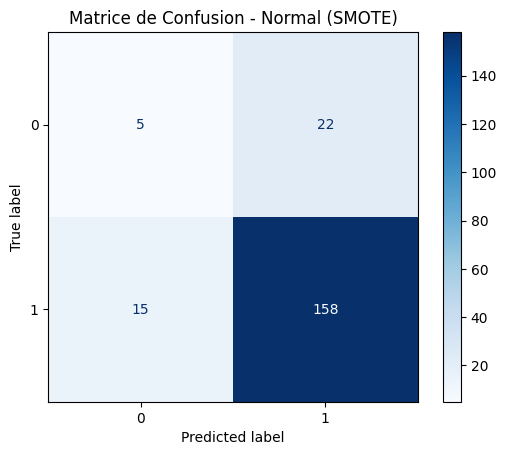


--- Decision Tree avec ADASYN - Normal ---
              precision    recall  f1-score   support

           0     0.2632    0.1852    0.2174        27
           1     0.8785    0.9191    0.8983       173

    accuracy                         0.8200       200
   macro avg     0.5708    0.5521    0.5578       200
weighted avg     0.7954    0.8200    0.8064       200



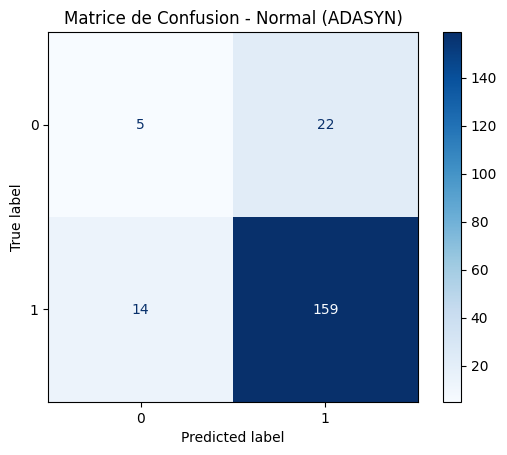


--- Decision Tree avec SMOTETomek - Normal ---
              precision    recall  f1-score   support

           0     0.2500    0.1852    0.2128        27
           1     0.8778    0.9133    0.8952       173

    accuracy                         0.8150       200
   macro avg     0.5639    0.5492    0.5540       200
weighted avg     0.7930    0.8150    0.8031       200



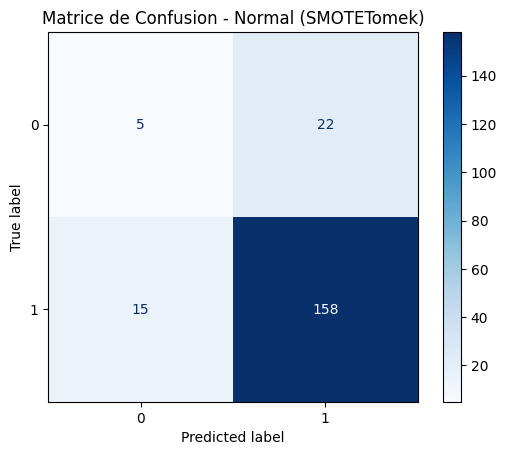


--- Decision Tree avec SMOTE - RF ---
              precision    recall  f1-score   support

           0     0.2667    0.4444    0.3333        27
           1     0.9032    0.8092    0.8537       173

    accuracy                         0.7600       200
   macro avg     0.5849    0.6268    0.5935       200
weighted avg     0.8173    0.7600    0.7834       200



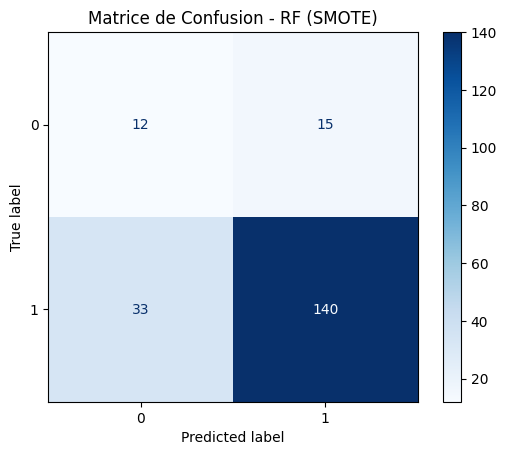


--- Decision Tree avec ADASYN - RF ---
              precision    recall  f1-score   support

           0     0.2353    0.4444    0.3077        27
           1     0.8993    0.7746    0.8323       173

    accuracy                         0.7300       200
   macro avg     0.5673    0.6095    0.5700       200
weighted avg     0.8097    0.7300    0.7615       200



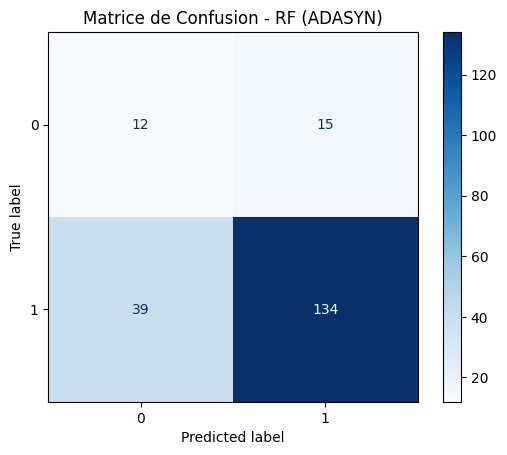


--- Decision Tree avec SMOTETomek - RF ---
              precision    recall  f1-score   support

           0     0.2667    0.4444    0.3333        27
           1     0.9032    0.8092    0.8537       173

    accuracy                         0.7600       200
   macro avg     0.5849    0.6268    0.5935       200
weighted avg     0.8173    0.7600    0.7834       200



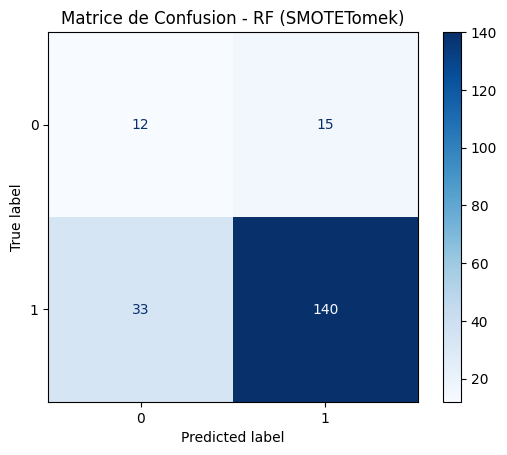


--- Decision Tree avec SMOTE - PCA ---
              precision    recall  f1-score   support

           0     0.2273    0.1852    0.2041        27
           1     0.8764    0.9017    0.8889       173

    accuracy                         0.8050       200
   macro avg     0.5518    0.5435    0.5465       200
weighted avg     0.7888    0.8050    0.7964       200



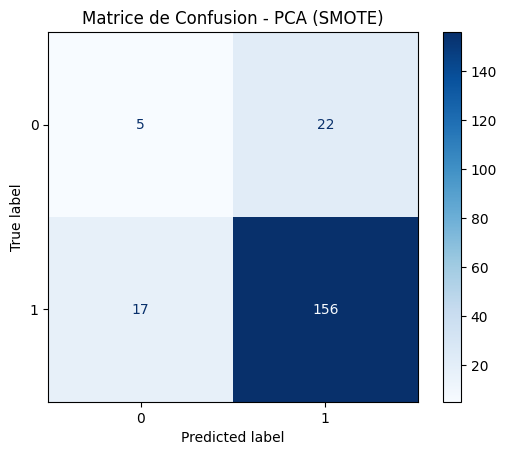


--- Decision Tree avec ADASYN - PCA ---
              precision    recall  f1-score   support

           0     0.1538    0.0741    0.1000        27
           1     0.8663    0.9364    0.9000       173

    accuracy                         0.8200       200
   macro avg     0.5101    0.5052    0.5000       200
weighted avg     0.7701    0.8200    0.7920       200



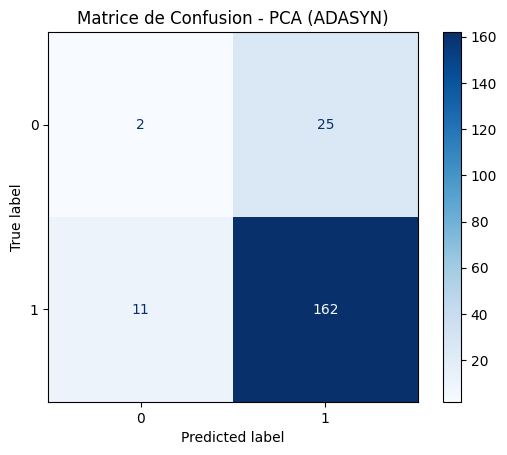


--- Decision Tree avec SMOTETomek - PCA ---
              precision    recall  f1-score   support

           0     0.2273    0.1852    0.2041        27
           1     0.8764    0.9017    0.8889       173

    accuracy                         0.8050       200
   macro avg     0.5518    0.5435    0.5465       200
weighted avg     0.7888    0.8050    0.7964       200



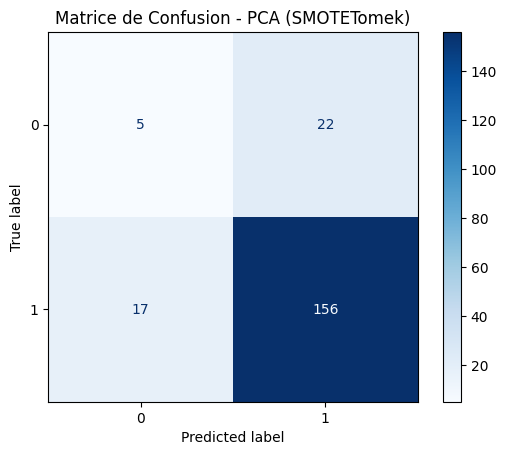

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt


def run_decision_tree_with_resampling(X_train, y_train, X_test, y_test, method_name, dataset_name):
    print(f"\n--- Decision Tree avec {method_name} - {dataset_name} ---")

    # Choix de la méthode de rééchantillonnage
    if method_name == 'SMOTE':
        sampler = SMOTE(random_state=42)
    elif method_name == 'ADASYN':
        sampler = ADASYN(random_state=42)
    elif method_name == 'SMOTETomek':
        sampler = SMOTETomek(random_state=42)
    else:
        raise ValueError("Méthode inconnue : SMOTE, ADASYN ou SMOTETomek")

    # Rééchantillonnage sur les données d'entraînement
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

    # Création du modèle Decision Tree avec gestion du déséquilibre
    model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

    # Entraînement
    model.fit(X_resampled, y_resampled)

    # Prédiction
    y_pred = model.predict(X_test)

    # Évaluation
    print(classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Matrice de Confusion - {dataset_name} ({method_name})")
    plt.grid(False)
    plt.show()

# Application sur tes datasets

for dataset_name, (X_train, X_test, y_train, y_test) in {
    "Normal": (Xn_train, Xn_test, yn_train, yn_test),
    "RF": (Xrf_train, Xrf_test, yrf_train, yrf_test),
    "PCA": (Xpca_train, Xpca_test, ypca_train, ypca_test)
}.items():
    for method in ['SMOTE', 'ADASYN', 'SMOTETomek']:
        run_decision_tree_with_resampling(X_train, y_train, X_test, y_test, method, dataset_name)


###KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

def find_best_k(X_train, y_train, max_k=30):
    scores = []
    k_range = range(1, max_k + 1)
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        # Validation croisée 5-fold sur accuracy
        cv_score = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean()
        scores.append(cv_score)
    best_k = k_range[np.argmax(scores)]
    print(f"Meilleur k trouvé : {best_k} avec score CV = {max(scores):.4f}")
    return best_k


#### KNN normal

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def run_knn(X_train, y_train, X_test, y_test, dataset_name):
    print(f"\n--- KNN - {dataset_name} ---")

    # Trouver le meilleur k
    best_k = find_best_k(X_train, y_train)

    # Entraîner avec meilleur k
    model = KNeighborsClassifier(n_neighbors=best_k)
    model.fit(X_train, y_train)

    # Prédiction
    y_pred = model.predict(X_test)

    # Évaluation
    print(classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Matrice de Confusion - {dataset_name} (k={best_k})")
    plt.grid(False)
    plt.show()



--- KNN - Normal ---
Meilleur k trouvé : 15 avec score CV = 0.9050
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        27
           1     0.8650    1.0000    0.9276       173

    accuracy                         0.8650       200
   macro avg     0.4325    0.5000    0.4638       200
weighted avg     0.7482    0.8650    0.8024       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


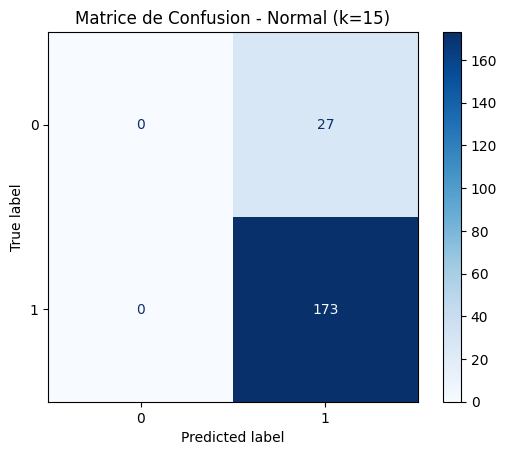


--- KNN - RF ---
Meilleur k trouvé : 13 avec score CV = 0.9050
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        27
           1     0.8650    1.0000    0.9276       173

    accuracy                         0.8650       200
   macro avg     0.4325    0.5000    0.4638       200
weighted avg     0.7482    0.8650    0.8024       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


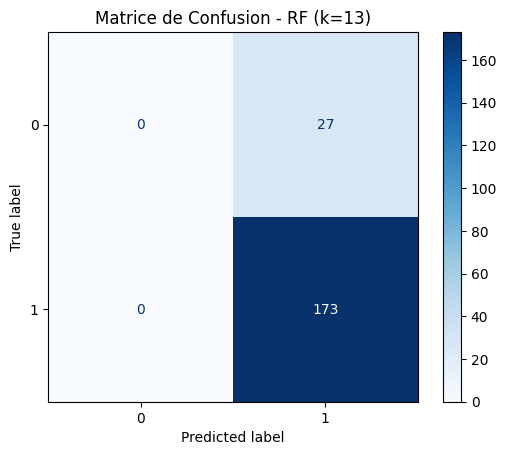


--- KNN - PCA ---
Meilleur k trouvé : 17 avec score CV = 0.9050
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        27
           1     0.8650    1.0000    0.9276       173

    accuracy                         0.8650       200
   macro avg     0.4325    0.5000    0.4638       200
weighted avg     0.7482    0.8650    0.8024       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


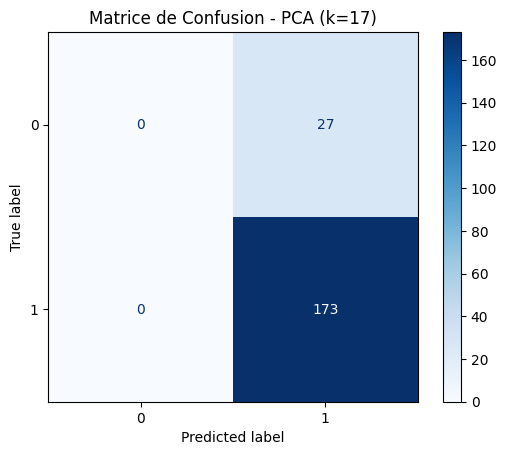

In [ ]:
datasets = {
    "Normal": (Xn_train, Xn_test, yn_train, yn_test),
    "RF": (Xrf_train, Xrf_test, yrf_train, yrf_test),
    "PCA": (Xpca_train, Xpca_test, ypca_train, ypca_test)
}

# KNN simple (sans rééquilibrage)
for name, (Xtr, Xte, ytr, yte) in datasets.items():
    run_knn(Xtr, ytr, Xte, yte, name)

#### KNN avec SMOTE_ADASYN_SMOTETOMEK

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek

def run_knn_with_resampling(X_train, y_train, X_test, y_test, method_name, dataset_name):
    print(f"\n--- KNN avec {method_name} - {dataset_name} ---")

    # Choix méthode rééchantillonnage
    if method_name == 'SMOTE':
        sampler = SMOTE(random_state=42)
    elif method_name == 'ADASYN':
        sampler = ADASYN(random_state=42)
    elif method_name == 'SMOTETomek':
        sampler = SMOTETomek(random_state=42)
    else:
        raise ValueError("Méthode inconnue : SMOTE, ADASYN ou SMOTETomek")

    # Rééchantillonnage
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

    # Trouver le meilleur k sur les données rééchantillonnées
    best_k = find_best_k(X_resampled, y_resampled)

    # Entraînement
    model = KNeighborsClassifier(n_neighbors=best_k)
    model.fit(X_resampled, y_resampled)

    # Prédiction sur test original
    y_pred = model.predict(X_test)

    # Évaluation
    print(classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Matrice de Confusion - {dataset_name} ({method_name}, k={best_k})")
    plt.grid(False)
    plt.show()



--- KNN avec SMOTE - Normal ---
Meilleur k trouvé : 1 avec score CV = 0.8226
              precision    recall  f1-score   support

           0     0.2667    0.1481    0.1905        27
           1     0.8757    0.9364    0.9050       173

    accuracy                         0.8300       200
   macro avg     0.5712    0.5423    0.5478       200
weighted avg     0.7935    0.8300    0.8086       200



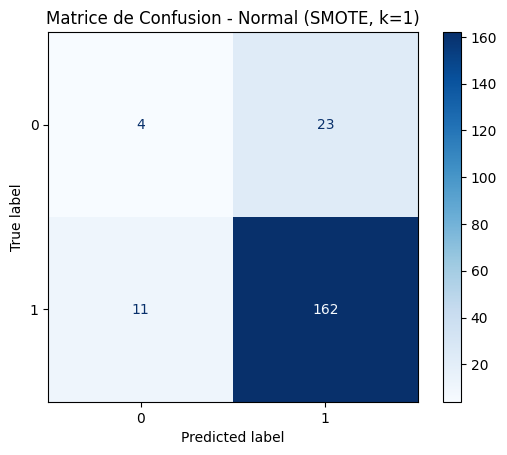


--- KNN avec ADASYN - Normal ---
Meilleur k trouvé : 2 avec score CV = 0.7900
              precision    recall  f1-score   support

           0     0.2424    0.2963    0.2667        27
           1     0.8862    0.8555    0.8706       173

    accuracy                         0.7800       200
   macro avg     0.5643    0.5759    0.5686       200
weighted avg     0.7993    0.7800    0.7891       200



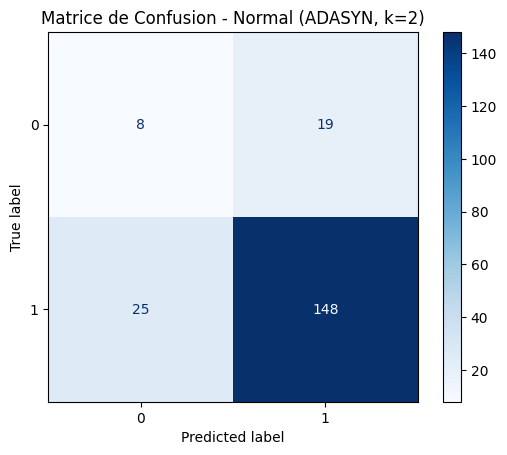


--- KNN avec SMOTETomek - Normal ---
Meilleur k trouvé : 1 avec score CV = 0.8172
              precision    recall  f1-score   support

           0     0.2500    0.1481    0.1860        27
           1     0.8750    0.9306    0.9020       173

    accuracy                         0.8250       200
   macro avg     0.5625    0.5394    0.5440       200
weighted avg     0.7906    0.8250    0.8053       200



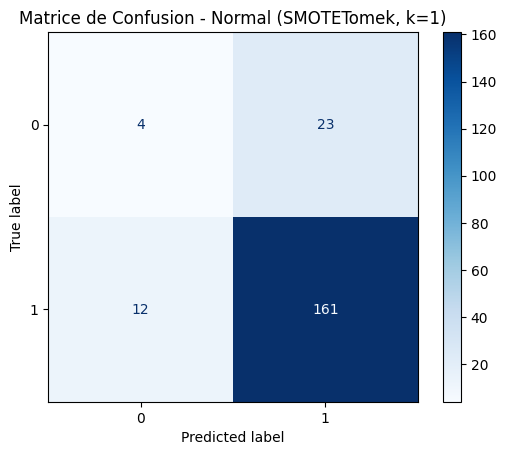


--- KNN avec SMOTE - RF ---
Meilleur k trouvé : 2 avec score CV = 0.7259
              precision    recall  f1-score   support

           0     0.1964    0.4074    0.2651        27
           1     0.8889    0.7399    0.8076       173

    accuracy                         0.6950       200
   macro avg     0.5427    0.5736    0.5363       200
weighted avg     0.7954    0.6950    0.7343       200



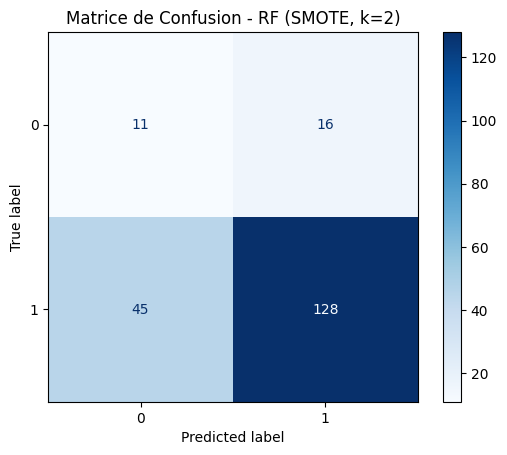


--- KNN avec ADASYN - RF ---
Meilleur k trouvé : 2 avec score CV = 0.6559
              precision    recall  f1-score   support

           0     0.2097    0.4815    0.2921        27
           1     0.8986    0.7168    0.7974       173

    accuracy                         0.6850       200
   macro avg     0.5541    0.5991    0.5448       200
weighted avg     0.8056    0.6850    0.7292       200



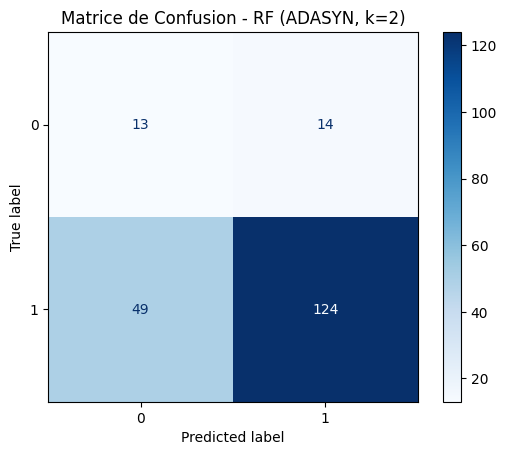


--- KNN avec SMOTETomek - RF ---
Meilleur k trouvé : 2 avec score CV = 0.7259
              precision    recall  f1-score   support

           0     0.1964    0.4074    0.2651        27
           1     0.8889    0.7399    0.8076       173

    accuracy                         0.6950       200
   macro avg     0.5427    0.5736    0.5363       200
weighted avg     0.7954    0.6950    0.7343       200



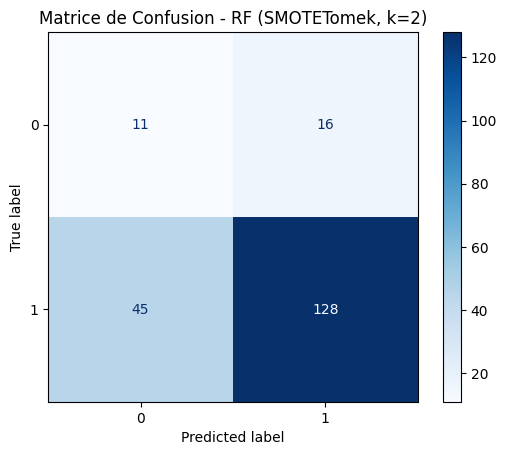


--- KNN avec SMOTE - PCA ---
Meilleur k trouvé : 1 avec score CV = 0.8447
              precision    recall  f1-score   support

           0     0.2727    0.2222    0.2449        27
           1     0.8820    0.9075    0.8946       173

    accuracy                         0.8150       200
   macro avg     0.5774    0.5649    0.5697       200
weighted avg     0.7998    0.8150    0.8069       200



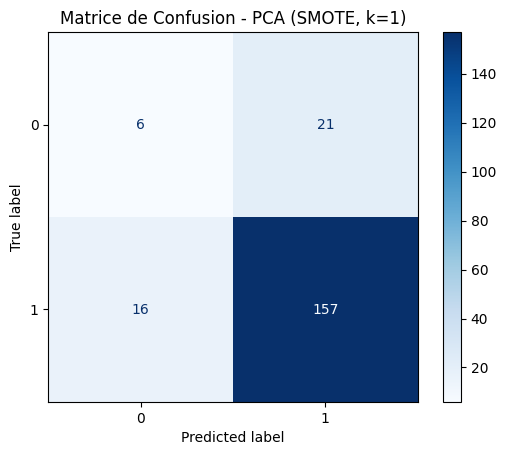


--- KNN avec ADASYN - PCA ---
Meilleur k trouvé : 1 avec score CV = 0.8059
              precision    recall  f1-score   support

           0     0.2500    0.1481    0.1860        27
           1     0.8750    0.9306    0.9020       173

    accuracy                         0.8250       200
   macro avg     0.5625    0.5394    0.5440       200
weighted avg     0.7906    0.8250    0.8053       200



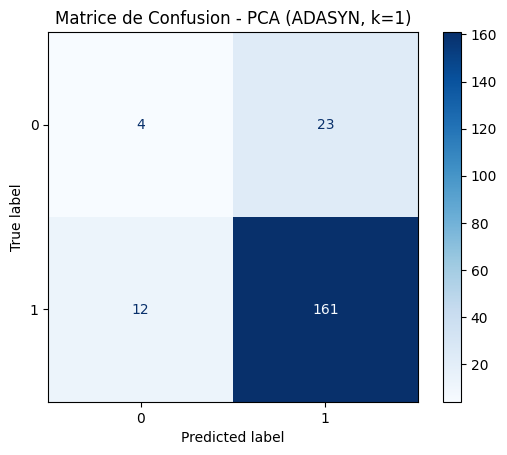


--- KNN avec SMOTETomek - PCA ---
Meilleur k trouvé : 2 avec score CV = 0.8279
              precision    recall  f1-score   support

           0     0.1875    0.2222    0.2034        27
           1     0.8750    0.8497    0.8622       173

    accuracy                         0.7650       200
   macro avg     0.5312    0.5360    0.5328       200
weighted avg     0.7822    0.7650    0.7732       200



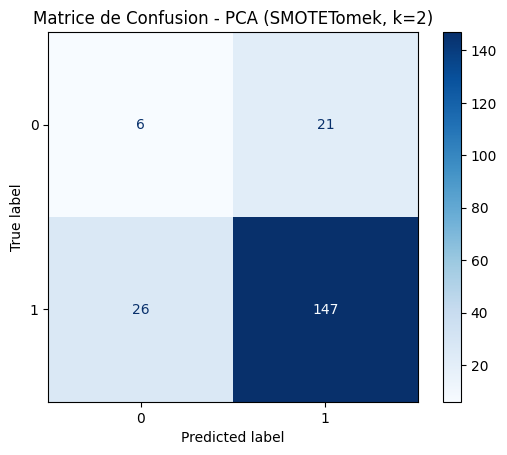

In [ ]:
# KNN avec rééquilibrage
for name, (Xtr, Xte, ytr, yte) in datasets.items():
    for method in ['SMOTE', 'ADASYN', 'SMOTETomek']:
        run_knn_with_resampling(Xtr, ytr, Xte, yte, method, name)

###Random Forest


=== Random Forest avec SMOTE sur X_normal ===
              precision    recall  f1-score   support

           0     0.3077    0.1481    0.2000        27
           1     0.8770    0.9480    0.9111       173

    accuracy                         0.8400       200
   macro avg     0.5923    0.5481    0.5556       200
weighted avg     0.8001    0.8400    0.8151       200



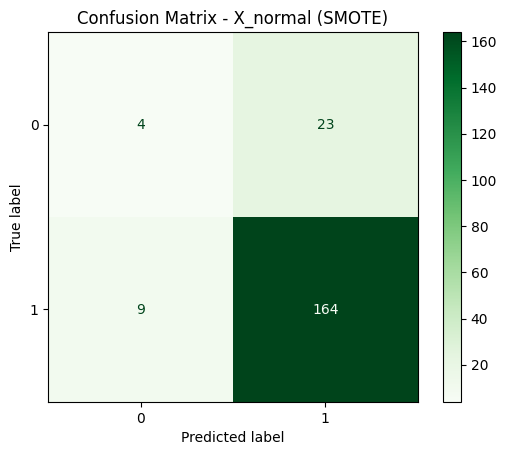


=== Random Forest avec ADASYN sur X_normal ===
              precision    recall  f1-score   support

           0     0.2778    0.1852    0.2222        27
           1     0.8791    0.9249    0.9014       173

    accuracy                         0.8250       200
   macro avg     0.5784    0.5550    0.5618       200
weighted avg     0.7979    0.8250    0.8097       200



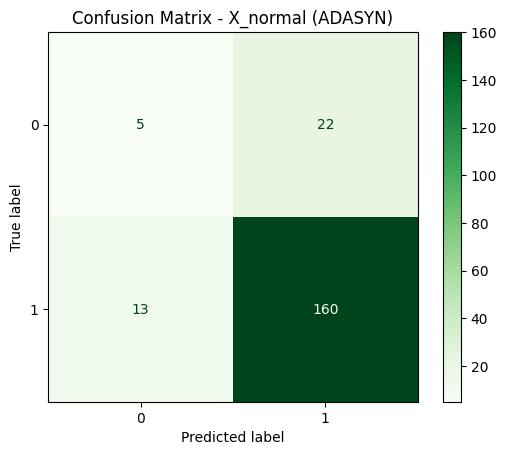


=== Random Forest avec SMOTETomek sur X_normal ===
              precision    recall  f1-score   support

           0     0.2778    0.1852    0.2222        27
           1     0.8791    0.9249    0.9014       173

    accuracy                         0.8250       200
   macro avg     0.5784    0.5550    0.5618       200
weighted avg     0.7979    0.8250    0.8097       200



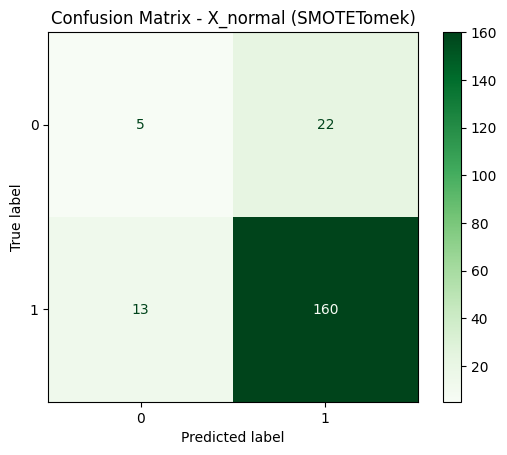


=== Random Forest avec SMOTE sur X_rf ===
              precision    recall  f1-score   support

           0     0.2791    0.4444    0.3429        27
           1     0.9045    0.8208    0.8606       173

    accuracy                         0.7700       200
   macro avg     0.5918    0.6326    0.6017       200
weighted avg     0.8200    0.7700    0.7907       200



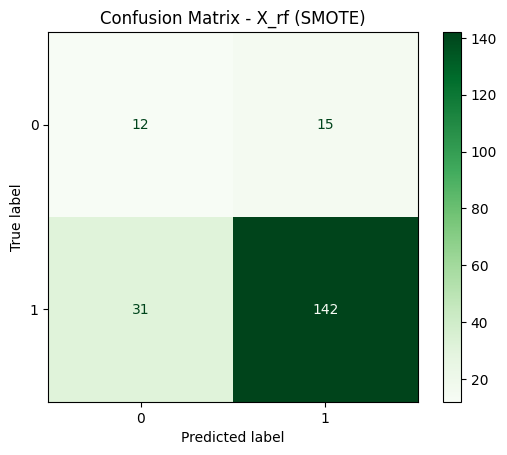


=== Random Forest avec ADASYN sur X_rf ===
              precision    recall  f1-score   support

           0     0.2667    0.4444    0.3333        27
           1     0.9032    0.8092    0.8537       173

    accuracy                         0.7600       200
   macro avg     0.5849    0.6268    0.5935       200
weighted avg     0.8173    0.7600    0.7834       200



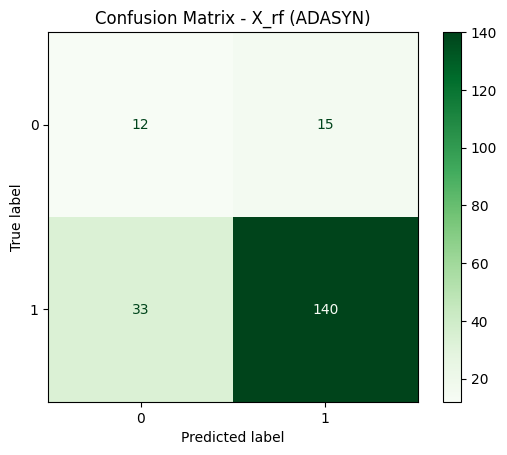


=== Random Forest avec SMOTETomek sur X_rf ===
              precision    recall  f1-score   support

           0     0.2791    0.4444    0.3429        27
           1     0.9045    0.8208    0.8606       173

    accuracy                         0.7700       200
   macro avg     0.5918    0.6326    0.6017       200
weighted avg     0.8200    0.7700    0.7907       200



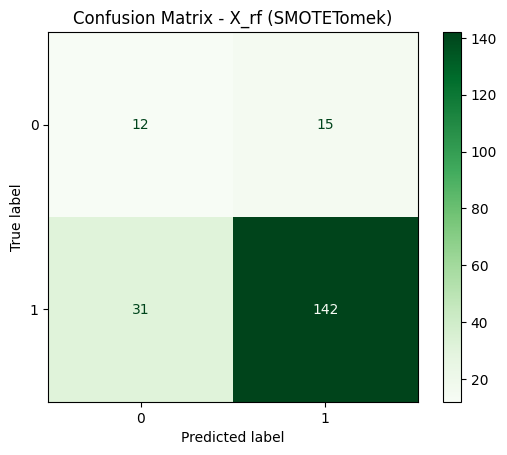


=== Random Forest avec SMOTE sur X_pca ===
              precision    recall  f1-score   support

           0     0.2778    0.1852    0.2222        27
           1     0.8791    0.9249    0.9014       173

    accuracy                         0.8250       200
   macro avg     0.5784    0.5550    0.5618       200
weighted avg     0.7979    0.8250    0.8097       200



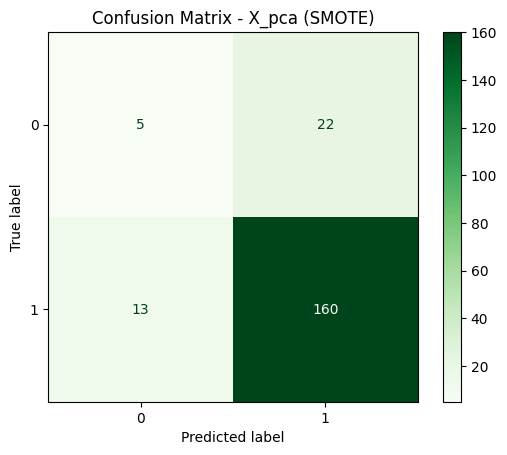


=== Random Forest avec ADASYN sur X_pca ===
              precision    recall  f1-score   support

           0     0.2174    0.1852    0.2000        27
           1     0.8757    0.8960    0.8857       173

    accuracy                         0.8000       200
   macro avg     0.5465    0.5406    0.5429       200
weighted avg     0.7868    0.8000    0.7931       200



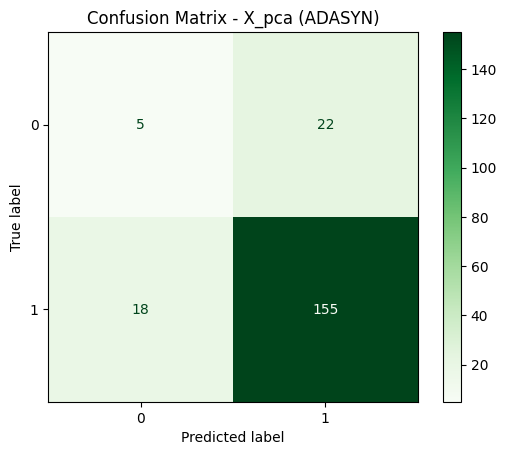


=== Random Forest avec SMOTETomek sur X_pca ===
              precision    recall  f1-score   support

           0     0.2632    0.1852    0.2174        27
           1     0.8785    0.9191    0.8983       173

    accuracy                         0.8200       200
   macro avg     0.5708    0.5521    0.5578       200
weighted avg     0.7954    0.8200    0.8064       200



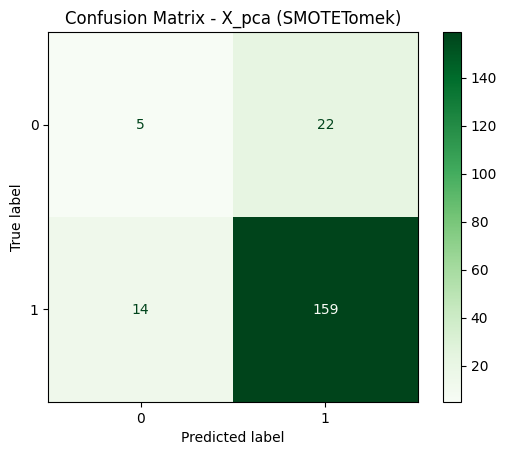

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt

def balance_and_train_rf(X_train, y_train, X_test, y_test, method_name, dataset_name):
    if method_name == 'SMOTE':
        sampler = SMOTE(random_state=42)
    elif method_name == 'ADASYN':
        sampler = ADASYN(random_state=42)
    elif method_name == 'SMOTETomek':
        sampler = SMOTETomek(random_state=42)
    else:
        raise ValueError("Méthode inconnue : SMOTE, ADASYN ou SMOTETomek")

    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_resampled, y_resampled)

    y_pred = model.predict(X_test)

    print(f"\n=== Random Forest avec {method_name} sur {dataset_name} ===")
    print(classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Greens")
    plt.title(f"Confusion Matrix - {dataset_name} ({method_name})")
    plt.grid(False)
    plt.show()

# Application aux datasets
for dataset_name, X_tr, y_tr, X_te, y_te in [
    ("X_normal", Xn_train, yn_train, Xn_test, yn_test),
    ("X_rf", Xrf_train, yrf_train, Xrf_test, yrf_test),
    ("X_pca", Xpca_train, ypca_train, Xpca_test, ypca_test)
]:
    for method in ['SMOTE', 'ADASYN', 'SMOTETomek']:
        balance_and_train_rf(X_tr, y_tr, X_te, y_te, method, dataset_name)


###MLP

=== MLP sur X_normal ===
Meilleurs paramètres: {'activation': 'relu', 'hidden_layer_sizes': (100, 50), 'max_iter': 200, 'solver': 'adam'}
Meilleur score F1 en CV: 0.8134
Rapport classification sur test set:
              precision    recall  f1-score   support

           0       0.29      0.44      0.35        27
           1       0.91      0.83      0.86       173

    accuracy                           0.78       200
   macro avg       0.60      0.64      0.61       200
weighted avg       0.82      0.78      0.79       200

Matrice de confusion :
 [[ 12  15]
 [ 30 143]]


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


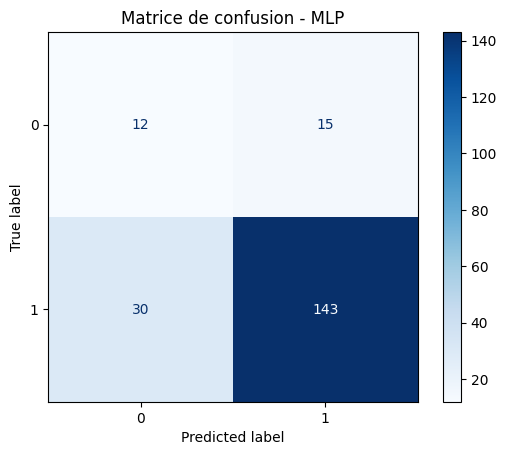

=== MLP sur X_rf ===
Meilleurs paramètres: {'activation': 'relu', 'hidden_layer_sizes': (100, 50), 'max_iter': 200, 'solver': 'adam'}
Meilleur score F1 en CV: 0.7509
Rapport classification sur test set:
              precision    recall  f1-score   support

           0       0.19      0.48      0.27        27
           1       0.89      0.68      0.77       173

    accuracy                           0.66       200
   macro avg       0.54      0.58      0.52       200
weighted avg       0.80      0.66      0.71       200

Matrice de confusion :
 [[ 13  14]
 [ 55 118]]


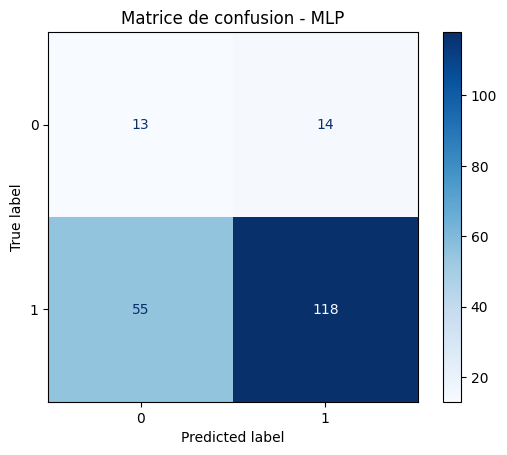

=== MLP sur X_pca ===
Meilleurs paramètres: {'activation': 'relu', 'hidden_layer_sizes': (100, 50), 'max_iter': 200, 'solver': 'adam'}
Meilleur score F1 en CV: 0.8219
Rapport classification sur test set:
              precision    recall  f1-score   support

           0       0.23      0.41      0.29        27
           1       0.89      0.79      0.84       173

    accuracy                           0.73       200
   macro avg       0.56      0.60      0.57       200
weighted avg       0.80      0.73      0.76       200

Matrice de confusion :
 [[ 11  16]
 [ 37 136]]


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


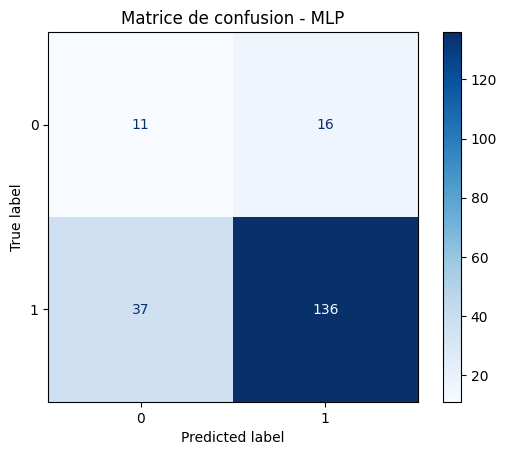

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def train_evaluate_mlp(X_train, y_train, X_test, y_test):
    # 1. Equilibrage SMOTE sur le train uniquement
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # 2. GridSearchCV pour MLP
    param_grid = {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam'],
        'max_iter': [200]
    }
    mlp = MLPClassifier(random_state=42)
    grid = GridSearchCV(mlp, param_grid, cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train_res, y_train_res)

    print(f"Meilleurs paramètres: {grid.best_params_}")
    print(f"Meilleur score F1 en CV: {grid.best_score_:.4f}")

    # 3. Evaluation sur test non équilibré
    y_pred = grid.best_estimator_.predict(X_test)
    print("Rapport classification sur test set:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    print("Matrice de confusion :\n", cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.best_estimator_.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Matrice de confusion - MLP")
    plt.show()

# Appelle la fonction pour chaque dataset

print("=== MLP sur X_normal ===")
train_evaluate_mlp(Xn_train, yn_train, Xn_test, yn_test)

print("=== MLP sur X_rf ===")
train_evaluate_mlp(Xrf_train, yrf_train, Xrf_test, yrf_test)

print("=== MLP sur X_pca ===")
train_evaluate_mlp(Xpca_train, ypca_train, Xpca_test, ypca_test)


###ANN

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



=== ANN avec SMOTE sur X_normal ===
              precision    recall  f1-score   support

           0     0.3030    0.3704    0.3333        27
           1     0.8982    0.8671    0.8824       173

    accuracy                         0.8000       200
   macro avg     0.6006    0.6187    0.6078       200
weighted avg     0.8179    0.8000    0.8082       200



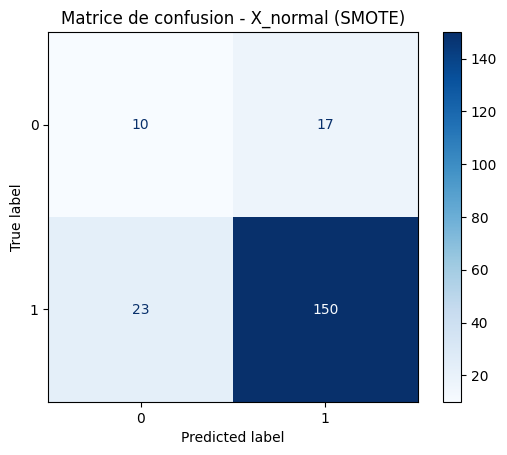


=== ANN avec ADASYN sur X_normal ===
              precision    recall  f1-score   support

           0     0.2292    0.4074    0.2933        27
           1     0.8947    0.7861    0.8369       173

    accuracy                         0.7350       200
   macro avg     0.5620    0.5968    0.5651       200
weighted avg     0.8049    0.7350    0.7635       200



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


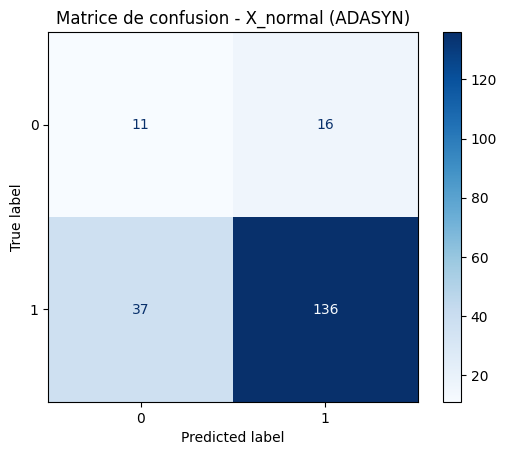

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



=== ANN avec SMOTETomek sur X_normal ===
              precision    recall  f1-score   support

           0     0.2432    0.3333    0.2812        27
           1     0.8896    0.8382    0.8631       173

    accuracy                         0.7700       200
   macro avg     0.5664    0.5857    0.5722       200
weighted avg     0.8023    0.7700    0.7845       200



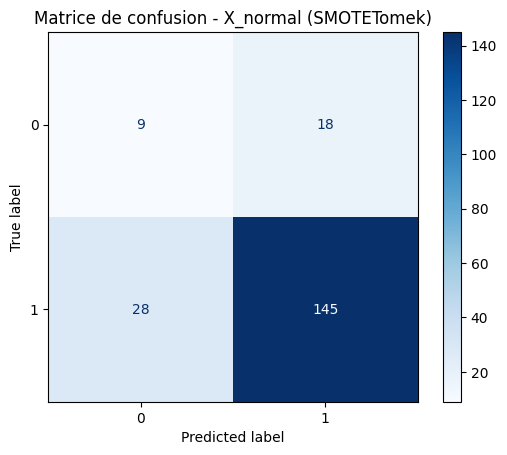

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



=== ANN avec SMOTE sur X_rf ===
              precision    recall  f1-score   support

           0     0.2125    0.6296    0.3178        27
           1     0.9167    0.6358    0.7509       173

    accuracy                         0.6350       200
   macro avg     0.5646    0.6327    0.5343       200
weighted avg     0.8216    0.6350    0.6924       200



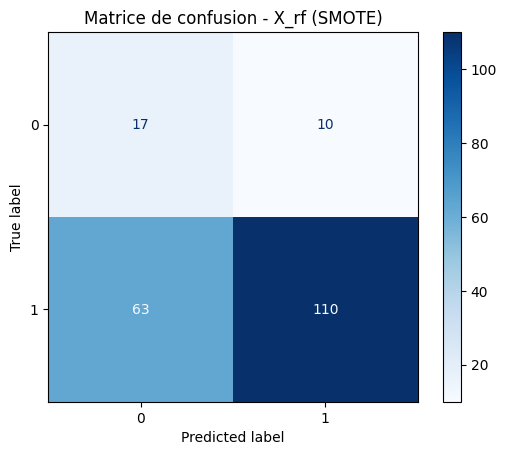


=== ANN avec ADASYN sur X_rf ===
              precision    recall  f1-score   support

           0     0.2073    0.6296    0.3119        27
           1     0.9153    0.6243    0.7423       173

    accuracy                         0.6250       200
   macro avg     0.5613    0.6270    0.5271       200
weighted avg     0.8197    0.6250    0.6842       200



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


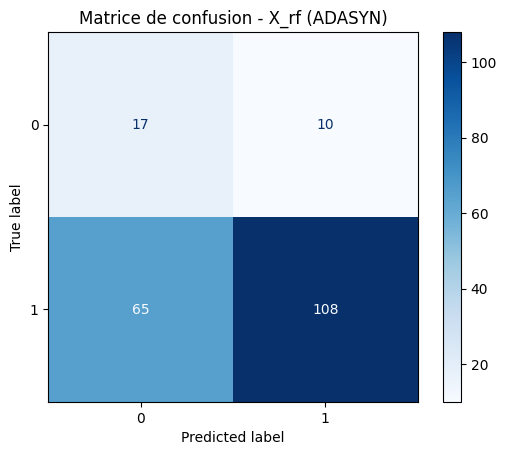


=== ANN avec SMOTETomek sur X_rf ===
              precision    recall  f1-score   support

           0     0.2125    0.6296    0.3178        27
           1     0.9167    0.6358    0.7509       173

    accuracy                         0.6350       200
   macro avg     0.5646    0.6327    0.5343       200
weighted avg     0.8216    0.6350    0.6924       200



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


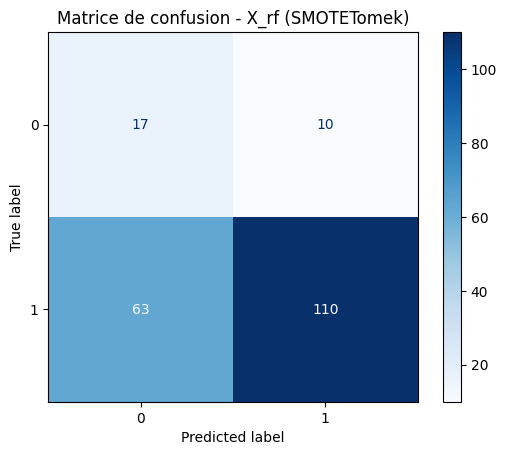

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



=== ANN avec SMOTE sur X_pca ===
              precision    recall  f1-score   support

           0     0.2791    0.4444    0.3429        27
           1     0.9045    0.8208    0.8606       173

    accuracy                         0.7700       200
   macro avg     0.5918    0.6326    0.6017       200
weighted avg     0.8200    0.7700    0.7907       200



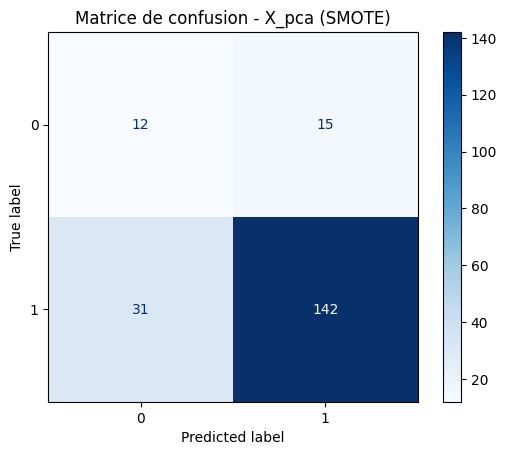


=== ANN avec ADASYN sur X_pca ===
              precision    recall  f1-score   support

           0     0.2500    0.4444    0.3200        27
           1     0.9013    0.7919    0.8431       173

    accuracy                         0.7450       200
   macro avg     0.5757    0.6182    0.5815       200
weighted avg     0.8134    0.7450    0.7725       200



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


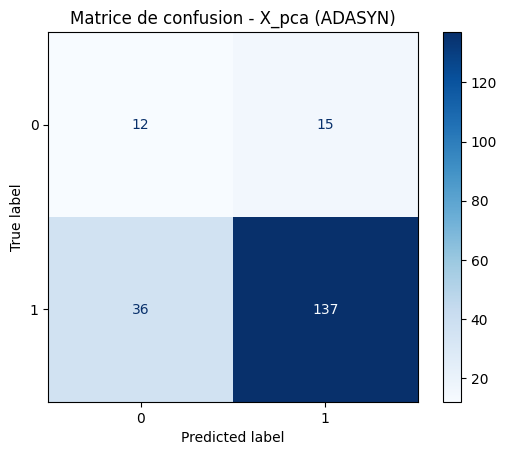


=== ANN avec SMOTETomek sur X_pca ===
              precision    recall  f1-score   support

           0     0.2609    0.4444    0.3288        27
           1     0.9026    0.8035    0.8502       173

    accuracy                         0.7550       200
   macro avg     0.5817    0.6240    0.5895       200
weighted avg     0.8160    0.7550    0.7798       200



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


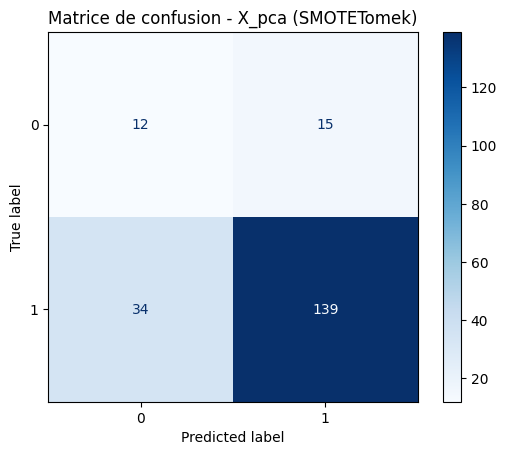

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt

def balance_and_train_ann(X_train, y_train, X_test, y_test, method_name, dataset_name):
    # Choix de la méthode de rééquilibrage
    if method_name == 'SMOTE':
        sampler = SMOTE(random_state=42)
    elif method_name == 'ADASYN':
        sampler = ADASYN(random_state=42)
    elif method_name == 'SMOTETomek':
        sampler = SMOTETomek(random_state=42)
    else:
        raise ValueError("Méthode inconnue : SMOTE, ADASYN ou SMOTETomek")

    # Rééquilibrage sur le train
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

    # Modèle ANN
    model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='tanh',
                          solver='adam', max_iter=300, random_state=42)
    model.fit(X_resampled, y_resampled)

    # Prédiction sur test
    y_pred = model.predict(X_test)

    # Affichage résultats
    print(f"\n=== ANN avec {method_name} sur {dataset_name} ===")
    print(classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"Matrice de confusion - {dataset_name} ({method_name})")
    plt.grid(False)
    plt.show()

# Liste des datasets et noms
datasets = [
    (Xn_train, yn_train, Xn_test, yn_test, 'X_normal'),
    (Xrf_train, yrf_train, Xrf_test, yrf_test, 'X_rf'),
    (Xpca_train, ypca_train, Xpca_test, ypca_test, 'X_pca')
]

# Liste des méthodes de rééquilibrage à tester
methods = ['SMOTE', 'ADASYN', 'SMOTETomek']

# Boucle sur datasets et méthodes
for X_train, y_train, X_test, y_test, dname in datasets:
    for method in methods:
        balance_and_train_ann(X_train, y_train, X_test, y_test, method, dname)


###XGBOOST

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:05:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost avec SMOTE sur X_normal ===
Scale_pos_weight utilisé : 1.00
              precision    recall  f1-score   support

           0       0.31      0.15      0.20        27
           1       0.88      0.95      0.91       173

    accuracy                           0.84       200
   macro avg       0.59      0.55      0.56       200
weighted avg       0.80      0.84      0.82       200



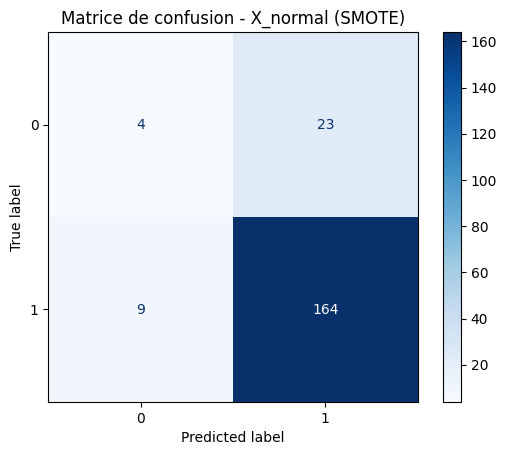


=== XGBoost avec SMOTE sur X_rf ===
Scale_pos_weight utilisé : 1.00
              precision    recall  f1-score   support

           0       0.28      0.44      0.34        27
           1       0.90      0.82      0.86       173

    accuracy                           0.77       200
   macro avg       0.59      0.63      0.60       200
weighted avg       0.82      0.77      0.79       200



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:05:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


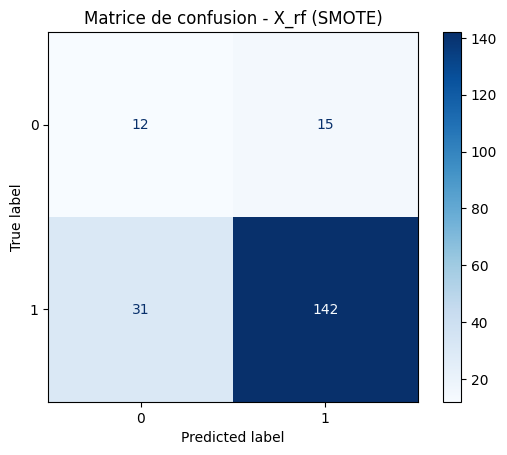

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:05:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost avec SMOTE sur X_pca ===
Scale_pos_weight utilisé : 1.00
              precision    recall  f1-score   support

           0       0.24      0.19      0.21        27
           1       0.88      0.91      0.89       173

    accuracy                           0.81       200
   macro avg       0.56      0.55      0.55       200
weighted avg       0.79      0.81      0.80       200



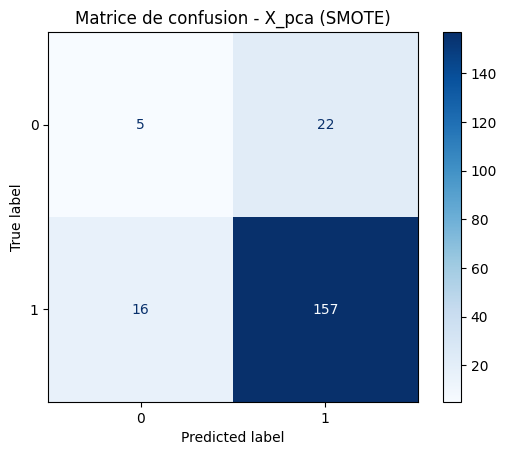

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:05:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost avec ADASYN sur X_normal ===
Scale_pos_weight utilisé : 0.99
              precision    recall  f1-score   support

           0       0.27      0.15      0.19        27
           1       0.88      0.94      0.91       173

    accuracy                           0.83       200
   macro avg       0.57      0.54      0.55       200
weighted avg       0.79      0.83      0.81       200



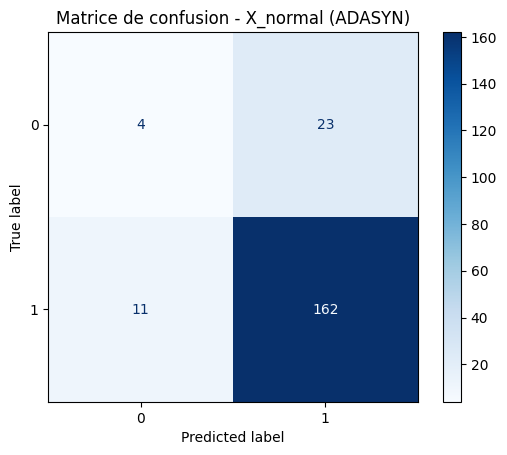

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:05:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost avec ADASYN sur X_rf ===
Scale_pos_weight utilisé : 0.98
              precision    recall  f1-score   support

           0       0.24      0.44      0.31        27
           1       0.90      0.77      0.83       173

    accuracy                           0.73       200
   macro avg       0.57      0.61      0.57       200
weighted avg       0.81      0.73      0.76       200



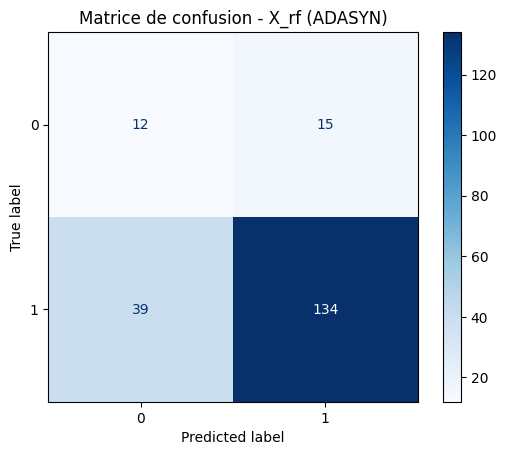

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:05:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost avec ADASYN sur X_pca ===
Scale_pos_weight utilisé : 1.02
              precision    recall  f1-score   support

           0       0.17      0.15      0.16        27
           1       0.87      0.88      0.88       173

    accuracy                           0.79       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.77      0.79      0.78       200



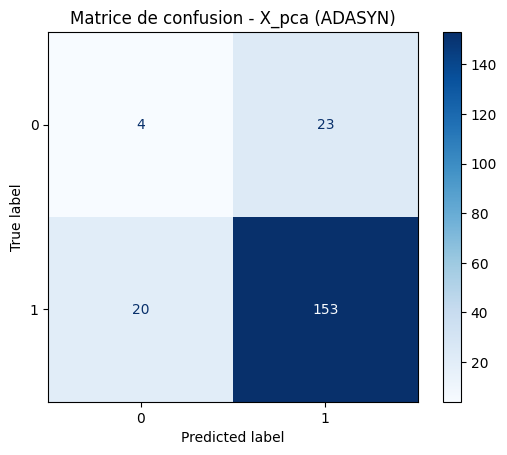

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:05:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost avec SMOTETomek sur X_normal ===
Scale_pos_weight utilisé : 1.00
              precision    recall  f1-score   support

           0       0.31      0.15      0.20        27
           1       0.88      0.95      0.91       173

    accuracy                           0.84       200
   macro avg       0.59      0.55      0.56       200
weighted avg       0.80      0.84      0.82       200



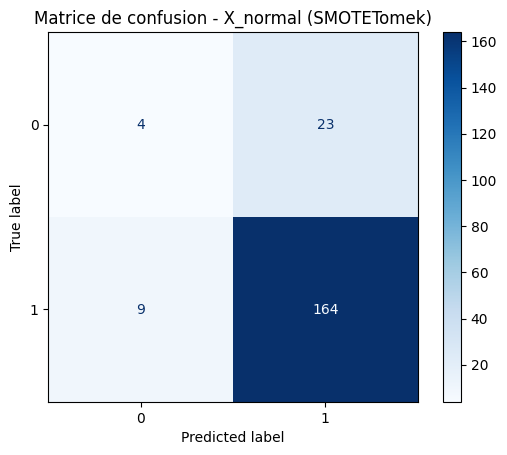


=== XGBoost avec SMOTETomek sur X_rf ===
Scale_pos_weight utilisé : 1.00
              precision    recall  f1-score   support

           0       0.28      0.44      0.34        27
           1       0.90      0.82      0.86       173

    accuracy                           0.77       200
   macro avg       0.59      0.63      0.60       200
weighted avg       0.82      0.77      0.79       200



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:05:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


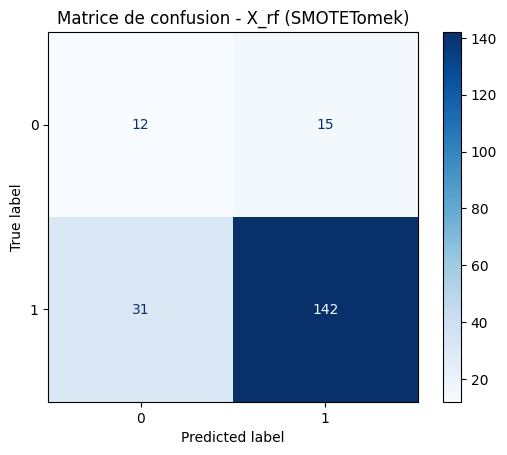

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:05:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost avec SMOTETomek sur X_pca ===
Scale_pos_weight utilisé : 1.00
              precision    recall  f1-score   support

           0       0.24      0.19      0.21        27
           1       0.88      0.91      0.89       173

    accuracy                           0.81       200
   macro avg       0.56      0.55      0.55       200
weighted avg       0.79      0.81      0.80       200



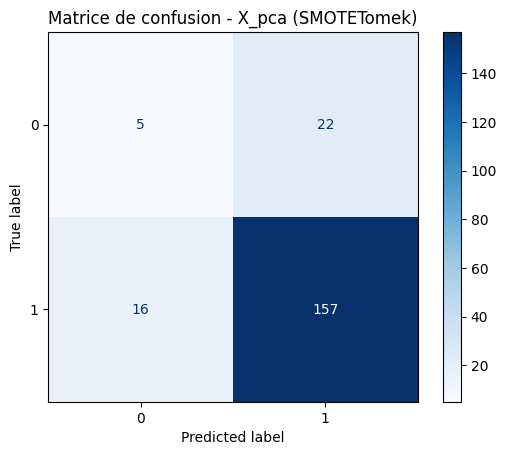

In [ ]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

def train_evaluate_xgboost_all(X_train, y_train, X_test, y_test, method_name, dataset_name):
    # Choix du rééquilibrage
    if method_name == 'SMOTE':
        sampler = SMOTE(random_state=42)
    elif method_name == 'ADASYN':
        sampler = ADASYN(random_state=42)
    elif method_name == 'SMOTETomek':
        sampler = SMOTETomek(random_state=42)
    else:
        raise ValueError("Méthode inconnue : SMOTE, ADASYN ou SMOTETomek")

    # Rééquilibrage des données d'entraînement
    X_res, y_res = sampler.fit_resample(X_train, y_train)

    # Calcul de scale_pos_weight pour XGBoost (ratio négatifs/positifs)
    neg_count = np.sum(y_res == 0)
    pos_count = np.sum(y_res == 1)
    scale_pos_weight = neg_count / pos_count if pos_count != 0 else 1

    # Création du modèle XGBoost avec scale_pos_weight
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                          random_state=42, scale_pos_weight=scale_pos_weight)

    # Entraînement
    model.fit(X_res, y_res)

    # Prédiction
    y_pred = model.predict(X_test)

    # Résultats
    print(f"\n=== XGBoost avec {method_name} sur {dataset_name} ===")
    print(f"Scale_pos_weight utilisé : {scale_pos_weight:.2f}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matrice de confusion - {dataset_name} ({method_name})")
    plt.grid(False)
    plt.show()


# Liste des méthodes et datasets
methods = ['SMOTE', 'ADASYN', 'SMOTETomek']
datasets = {
    'X_normal': (Xn_train, yn_train, Xn_test, yn_test),
    'X_rf': (Xrf_train, yrf_train, Xrf_test, yrf_test),
    'X_pca': (Xpca_train, ypca_train, Xpca_test, ypca_test)
}

# Boucle sur tous les combos
for method in methods:
    for ds_name, (X_tr, y_tr, X_te, y_te) in datasets.items():
        train_evaluate_xgboost_all(X_tr, y_tr, X_te, y_te, method, ds_name)


###AdaBOOST

##### visualisation modele

In [ ]:
#pip install wandb


In [ ]:
# 2. Se connecter à wandb
# Vous serez invité à coller votre clé API wandb.
import wandb
wandb.login()

# --- Assurez-vous que votre DataFrame overall_metrics_df est créé avant cette étape ---
# (Votre code précédent pour créer overall_metrics_df devrait être exécuté)


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [ ]:
# 3. Initialiser un nouveau run wandb
# et 'Comparaison Algorithmes Classification' par un nom descriptif pour ce run.
run = wandb.init(project='class_res_algo', name='Comparaison Algorithmes Classification')


In [ ]:
# 4. Créer une table wandb à partir du DataFrame
# Assurez-vous que overall_metrics_df existe et contient vos données
if 'overall_metrics_df' in locals() and isinstance(overall_metrics_df, pd.DataFrame):
    overall_metrics_table = wandb.Table(dataframe=overall_metrics_df)
    SVC = wandb.Table(dataframe=svc_comparison_df)
    KNN = wandb.Table(dataframe=knn_comparison_df)
    DT = wandb.Table(dataframe=dt_comparison_df)
    NB = wandb.Table(dataframe=nb_comparison_df)
    LR = wandb.Table(dataframe=lr_comparison_df)
    RF = wandb.Table(dataframe=rf_comparison_df)
    XGB = wandb.Table(dataframe=xgb_comparison_df)
    ADA = wandb.Table(dataframe=adaboost_comparison_df)


    # 5. Journaliser la table dans le run
    run.log({"Tableau de comparaison des métriques": overall_metrics_table})
    run.log({"Tableau de comparaison des métriques SVC": SVC})
    run.log({"Tableau de comparaison des métriques KNN": KNN})
    run.log({"Tableau de comparaison des métriques DT": DT})
    run.log({"Tableau de comparaison des métriques NB": NB})
    run.log({"Tableau de comparaison des métriques LR": LR})
    run.log({"Tableau de comparaison des métriques RF": RF})
    run.log({"Tableau de comparaison des métriques XGB": XGB})
    run.log({"Tableau de comparaison des métriques ADA": ADA})

    print("\nTableau de métriques journalisé dans wandb.")
else:
    print("Le DataFrame overall_metrics_df n'a pas été trouvé. Assurez-vous qu'il est créé avant de journaliser.")




Tableau de métriques journalisé dans wandb.


In [ ]:

# Choisir les colonnes de métriques que tu veux visualiser, ici on prend les principales
metrics_cols = [
    'Accuracy',
    'Precision (Class 0)', 'Recall (Class 0)', 'F1-score (Class 0)',
    'Precision (Class 1)', 'Recall (Class 1)', 'F1-score (Class 1)',
    'Macro Avg Precision', 'Macro Avg Recall', 'Macro Avg F1-score'
]

# S'assurer que ces colonnes existent dans ton DataFrame (sinon adapter)
metrics_df = svc_comparison_df[metrics_cols]

# Si plusieurs lignes (ex : plusieurs datasets ou resampling), on peut prendre la moyenne par exemple
metrics_mean = metrics_df.mean().reset_index()
metrics_mean.columns = ['Metric', 'Value']

# Forcer les types
metrics_mean = metrics_mean.astype({
    'Metric': 'str',
    'Value': 'float'
})

# Créer une table wandb à partir de ce DataFrame “long”
table_svc = wandb.Table(dataframe=metrics_mean)

# Créer un bar chart avec métrique en X et valeur en Y
svc_chart = wandb.plot.bar(table_svc, 'Metric', 'Value', title="Métriques Moyennes SVC")

# Logger le chart
run.log({'SVC Metrics Chart': svc_chart})

run.finish()

In [ ]:
# 6. Terminer le run wandb
print("Terminaison du run wandb...")
run.finish()

Terminaison du run wandb...



=== AdaBoost avec SMOTE sur X_normal ===
              precision    recall  f1-score   support

           0       0.30      0.30      0.30        27
           1       0.89      0.89      0.89       173

    accuracy                           0.81       200
   macro avg       0.59      0.59      0.59       200
weighted avg       0.81      0.81      0.81       200



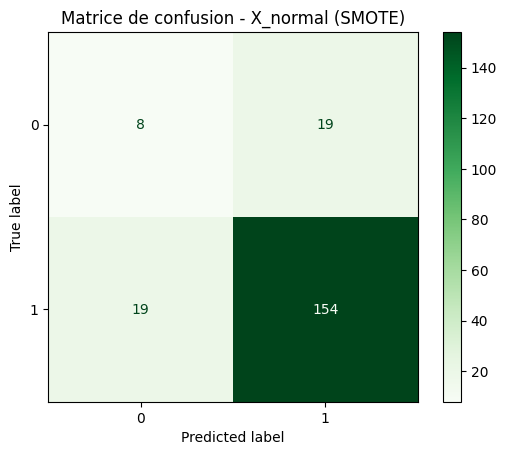


=== AdaBoost avec SMOTE sur X_rf ===
              precision    recall  f1-score   support

           0       0.26      0.59      0.36        27
           1       0.92      0.74      0.82       173

    accuracy                           0.72       200
   macro avg       0.59      0.67      0.59       200
weighted avg       0.83      0.72      0.76       200



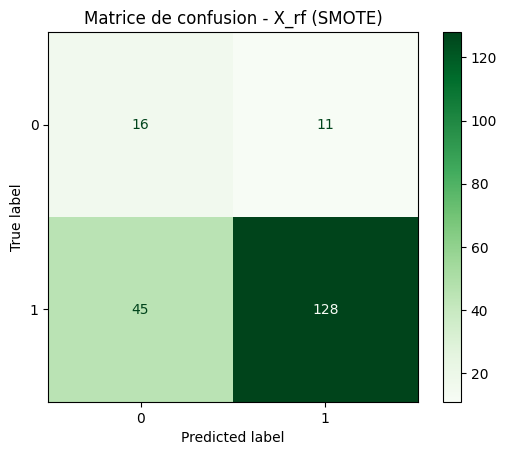


=== AdaBoost avec SMOTE sur X_pca ===
              precision    recall  f1-score   support

           0       0.26      0.59      0.36        27
           1       0.92      0.73      0.82       173

    accuracy                           0.71       200
   macro avg       0.59      0.66      0.59       200
weighted avg       0.83      0.71      0.76       200



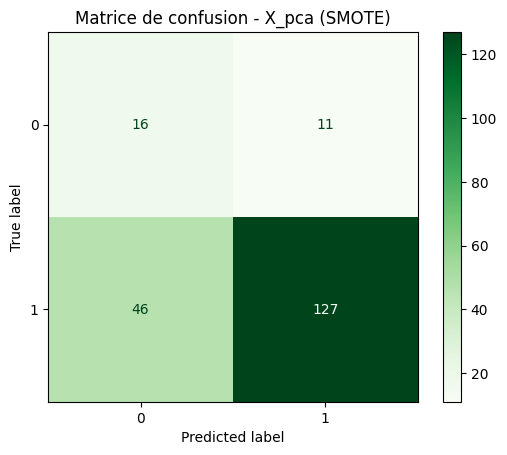


=== AdaBoost avec ADASYN sur X_normal ===
              precision    recall  f1-score   support

           0       0.27      0.22      0.24        27
           1       0.88      0.91      0.89       173

    accuracy                           0.81       200
   macro avg       0.58      0.56      0.57       200
weighted avg       0.80      0.81      0.81       200



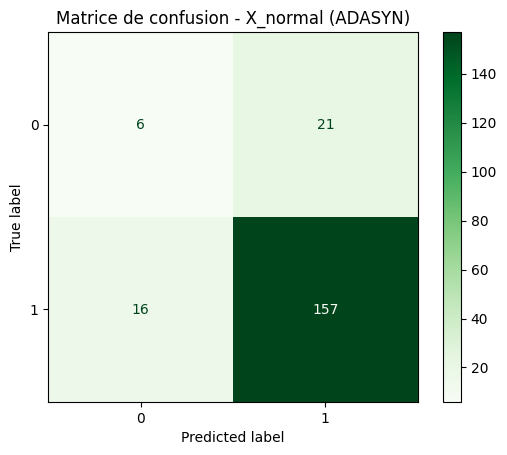


=== AdaBoost avec ADASYN sur X_rf ===
              precision    recall  f1-score   support

           0       0.30      0.59      0.40        27
           1       0.93      0.79      0.85       173

    accuracy                           0.76       200
   macro avg       0.61      0.69      0.62       200
weighted avg       0.84      0.76      0.79       200



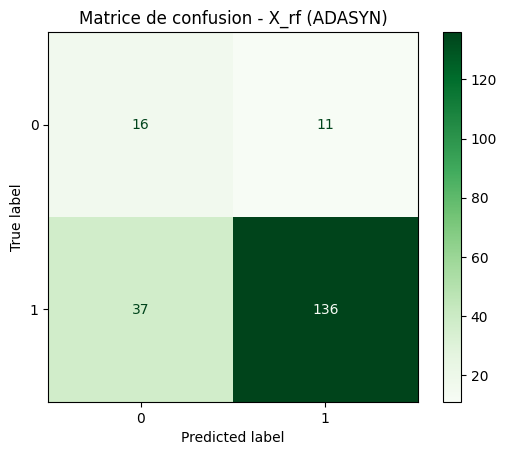


=== AdaBoost avec ADASYN sur X_pca ===
              precision    recall  f1-score   support

           0       0.24      0.63      0.34        27
           1       0.92      0.68      0.78       173

    accuracy                           0.68       200
   macro avg       0.58      0.66      0.56       200
weighted avg       0.83      0.68      0.72       200



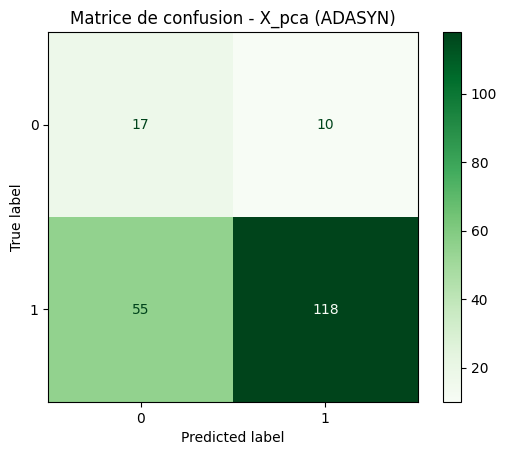


=== AdaBoost avec SMOTETomek sur X_normal ===
              precision    recall  f1-score   support

           0       0.23      0.26      0.25        27
           1       0.88      0.87      0.87       173

    accuracy                           0.79       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.79      0.79      0.79       200



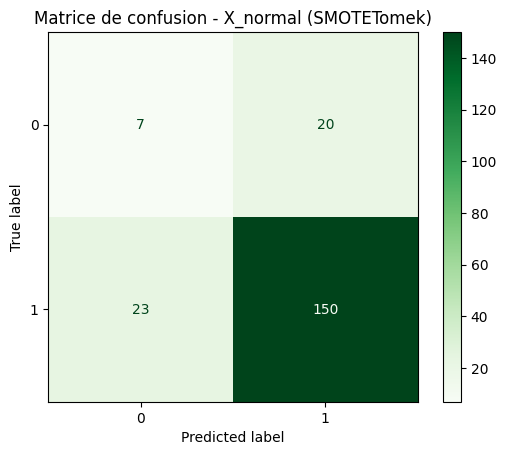


=== AdaBoost avec SMOTETomek sur X_rf ===
              precision    recall  f1-score   support

           0       0.26      0.59      0.36        27
           1       0.92      0.74      0.82       173

    accuracy                           0.72       200
   macro avg       0.59      0.67      0.59       200
weighted avg       0.83      0.72      0.76       200



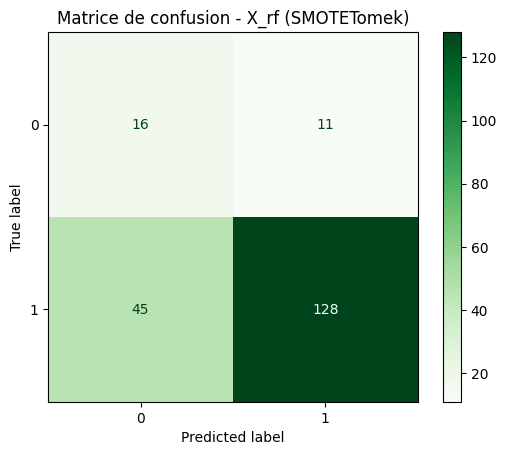


=== AdaBoost avec SMOTETomek sur X_pca ===
              precision    recall  f1-score   support

           0       0.26      0.59      0.36        27
           1       0.92      0.73      0.82       173

    accuracy                           0.71       200
   macro avg       0.59      0.66      0.59       200
weighted avg       0.83      0.71      0.76       200



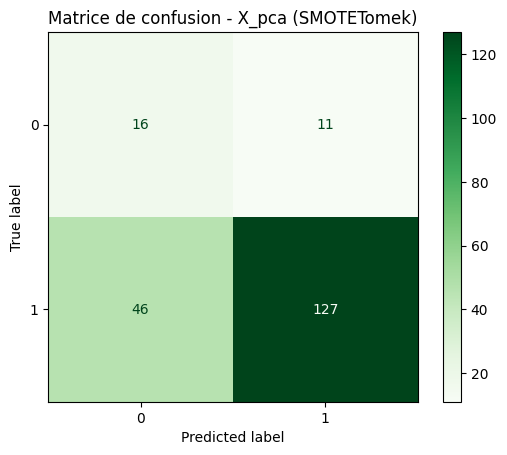

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def train_evaluate_adaboost_all(X_train, y_train, X_test, y_test, method_name, dataset_name):
    # Choix de la méthode de rééquilibrage
    if method_name == 'SMOTE':
        sampler = SMOTE(random_state=42)
    elif method_name == 'ADASYN':
        sampler = ADASYN(random_state=42)
    elif method_name == 'SMOTETomek':
        sampler = SMOTETomek(random_state=42)
    else:
        raise ValueError("Méthode inconnue : SMOTE, ADASYN ou SMOTETomek")

    # Rééquilibrage uniquement sur les données d'entraînement
    X_res, y_res = sampler.fit_resample(X_train, y_train)

    # Création et entraînement du modèle AdaBoost
    model = AdaBoostClassifier(random_state=42, n_estimators=100)
    model.fit(X_res, y_res)

    # Prédiction sur le test
    y_pred = model.predict(X_test)

    # Affichage des résultats
    print(f"\n=== AdaBoost avec {method_name} sur {dataset_name} ===")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Greens)
    plt.title(f"Matrice de confusion - {dataset_name} ({method_name})")
    plt.grid(False)
    plt.show()

# Liste des méthodes et datasets
methods = ['SMOTE', 'ADASYN', 'SMOTETomek']
datasets = {
    'X_normal': (Xn_train, yn_train, Xn_test, yn_test),
    'X_rf': (Xrf_train, yrf_train, Xrf_test, yrf_test),
    'X_pca': (Xpca_train, ypca_train, Xpca_test, ypca_test)
}

# Boucle sur tous les combos
for method in methods:
    for ds_name, (X_tr, y_tr, X_te, y_te) in datasets.items():
        train_evaluate_adaboost_all(X_tr, y_tr, X_te, y_te, method, ds_name)
